# B(M1) analysis

Collect proton/neutron M1 matrix elements from runs using random samples of USDB

$ B(M1) = \left[ g_s^p M_s^p + g_l^p M_l^p +  g_s^n M_s^n + g_l^n M_l^n  \right] ^2$ 

Free nucleon values:

$g_s^p = 5.5857$

$g_s^n = -3.8263 $

$g_l^p = 1.0 $

$g_l^n = 0.0 $ 



MCMC evaluation

$g_s^p = 4.35 \pm 0.47$

$g_s^n = -2.4 \pm 0.44 $

$g_l^p = 1.23 \pm 0.1 $

$g_l^n = -0.16 \pm 0.1 $ 

In [2]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import pickle as pkl
import sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [3]:
from scipy.special import factorial2

hbarc = 197300 #keV fm
hbar = 6.582E-19 #keV s
alpha = 1/137
mP = 938272 # kev/c^2
#muN = 3.152E-14 # MeV / T
muN2 =  alpha*hbarc**3*2*mP**-2 # nuclear magneton squared


def Thalf_width(E): #converts energy width (MeV) to Thalf in seconds
    return hbar * np.log(2)/(E/1000)

def Thalf_width_kev(E):
    if E==0.:
        return None
    return Thalf_width(E)

def times_so_far(ls):
    out = [0]*len(ls)
    for i in range(len(ls)):
        out[i] = ls[:i+1].count(ls[i])
    return out

def j_to_twoj(x):
    if '/2' in x:
        return int(x.strip('/2'))
    else:
        return 2*int(x.strip('()'))
    
def thalf_units_to_sec(units,value):
    m=0
    if units=='PS':
        m = 10**-12
    elif units=='NS':
        m = 10**-9
    elif units=='FS':
        m = 10**-15
    elif units=='US':
        m = 10**-6
    elif units=='AS':
        m = 10**-18
    elif units=='KEV':
        pass
    if m==0:
        return Thalf_width_kev(value)
    else:
        return m*value
    
def fLambda(l):
    return 8*np.pi*(l+1)/(l*(factorial2(2*l+1)**2))

def Bweisskopf(l,A):
    # Weisskopf estimate for El
    return (1/(4*np.pi)) * (3/(3+l))**2 * (1.2*A**(1/3))**(2*l)
    
def B_M1_Wu(B):
    return B / 1.79

In [4]:
path_to_usdb_csv = '/p/lustre2/fox39/shmuq/usdb/shmuq_m1/sd_M1_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [5]:
df_usdb

,Unnamed: 0,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.400,FS,2.000,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0900,0.0000,0.0900
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.000,FS,0.300,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1849,0.0000,-0.1849
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.390,NS,0.050,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,-0.0439,0.0000,0.0439
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.000,FS,19.000,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,0.0268,-0.0268,0.3135,-0.3135
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.200,FS,1.900,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1563,-0.1563,0.3789,-0.3789
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.000,FS,15.000,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,-0.1040,0.1040,-0.1876,0.1876
6,14,18,F,9,9,4360.1500,0.2600,1,19 FS 7,1298.0000,0.0000,100.000,0.000,M1,0.5000,0.2000,2,19.000,FS,7.000,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.000,FS,3.000,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,-0.0149,0.0149,-0.0706,0.0706
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0125,0.0125,0.1954,-0.1954


In [6]:
idx = df_usdb[(df_usdb['Mth_sp']==-999.0) | (df_usdb['Mth_lp']==-999.0) | (df_usdb['Mth_sn']==-999.0) | (df_usdb['Mth_ln']==-999.0)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['Mth_sp']==0.0) & (df_usdb['Mth_lp']==0.0) & (df_usdb['Mth_sn']==0.0) & (df_usdb['Mth_ln']==0.0)].index
df_usdb.loc[idx,'Include']=False

B_min = 0.01
n_max = 6
idx = df_usdb[(df_usdb['ni']>n_max) | (df_usdb['nf']>n_max)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['B_exp (W.u.)']<B_min)].index
df_usdb.loc[idx,'Include']=False

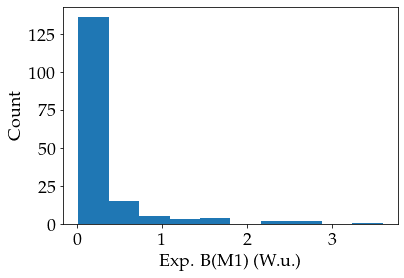

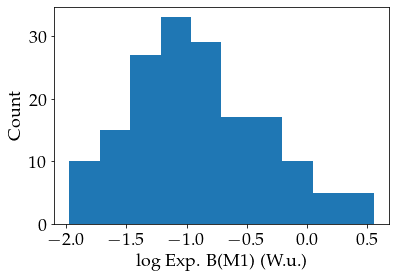

Out of 168 transitions, 155 are smaller than the Weisskopf estimate


In [7]:
y = df_usdb['B_exp (W.u.)']
plt.hist(y, bins=10, density=False)
plt.xlabel('Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()

y = np.log10(df_usdb['B_exp (W.u.)'])
plt.hist(y, bins=10, density=False)
plt.xlabel('log Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()
print(f'Out of {len(y)} transitions, {len(y[y<0])} are smaller than the Weisskopf estimate')

In [8]:
df_usdb = df_usdb.rename(columns={'Unnamed: 0':'Index'})

In [9]:
df_usdb = df_usdb[df_usdb['Include']==True]

In [10]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdb.vec',skiprows=1)

In [11]:
n_transitions = len(df_usdb)
n_params = 66
print('# transitions =', n_transitions)

# transitions = 143


In [12]:
df_usdb.keys()

Index(['Index', 'A', 'Element', 'Z', 'N', 'Energy (keV)', 'Energy Unc (keV)',
       'Ji', 'Thalf', 'E_gamma (keV)', 'E_gamma Unc (keV)', 'I_gamma',
       'I_gamma Unc', 'Mult', 'B_exp (W.u.)', 'B_exp Unc (W.u.)', 'twoJi',
       'Thalf Value', 'Thalf Units', 'Thalf Unc', 'Thalf (sec)',
       'Thalf Unc (sec)', 'B_exp (mu_N^2)', 'B_exp Unc (mu_N^2)', 'Nucleus',
       'Jf', 'twoJf', 'ni', 'nf', 'Include', 'Mth_sp', 'Mth_sn', 'Mth_lp',
       'Mth_ln'],
      dtype='object')

In [15]:
# plot error distribution with free nucleon couplings
B_exp = np.array(df_usdb['B_exp (W.u.)'])
B_exp_unc = np.array(df_usdb['B_exp Unc (W.u.)'])
M_sp = np.array(df_usdb['Mth_sp'])
M_lp = np.array(df_usdb['Mth_lp'])
M_sn = np.array(df_usdb['Mth_sn'])
M_ln = np.array(df_usdb['Mth_ln'])
g_sp_free = 5.5857
g_lp_free = 1.
g_sn_free = -3.8263
g_ln_free = 0.

def B_th(g_vec):
    g_sp, g_lp, g_sn, g_ln = g_vec
    B = ( g_sp * M_sp + g_lp * M_lp + g_sn * M_sn + g_ln * M_ln )**2
    return B

def chi2(g_vec,B_th_unc):
    # in W.u.
    R2 = (B_exp - B_M1_Wu(B_th(g_vec)))**2 / (B_exp_unc**2 + B_th_unc**2)
    chi2 = np.sum(R2)
    return chi2

g_vec_free = [g_sp_free, g_lp_free, g_sn_free, g_ln_free]
chi2(g_vec_free,0.5)/(n_transitions - n_params)

1.0580690758187399

In [16]:
def objective(x):
    return (1 -  ( chi2(g_vec_free,x)/(n_transitions - n_params) ) )**2

from scipy.optimize import minimize_scalar
opt_result = minimize_scalar(objective,)
print(opt_result.x)

0.5153812211207364


/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


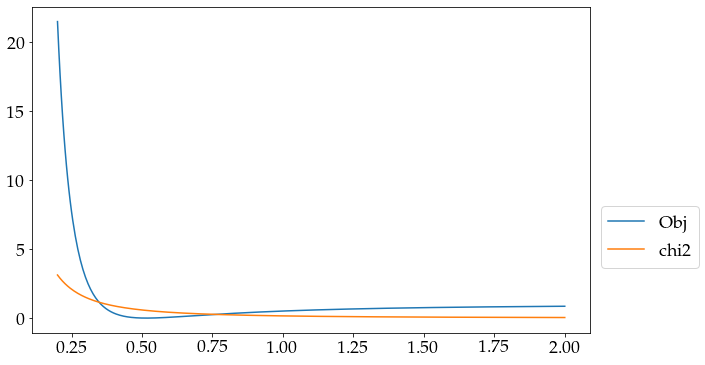

In [17]:
domain = np.linspace(0.2,2,400)
y = [objective(x) for x in domain]
y2 = [chi2(g_vec_free,x)/(len(B_exp)-4) for x in domain]

plt.figure(figsize=(10,6))
plt.plot(domain,y,label='Obj')
plt.plot(domain,y2,label='chi2')
plt.legend(loc = (1.02,0.2))
plt.show()

In [18]:
B_M1_th_unc = opt_result.x

In [19]:
from scipy.optimize import least_squares
opt = least_squares(chi2, x0=g_vec_free, args=[B_M1_th_unc])
g_vec_opt = opt.x

print(g_vec_opt)

[ 3.99033918  1.08233821 -1.71747097 -0.59699094]


In [20]:
with open('m1_results_10k_140422.pkl','rb') as fh:
    data = pkl.load(fh)
    
int_vec_list = []
mil_vec_list = []
df_dict = {}
for number in data:
    df_dict[number] = data[number][0]
    int_vec_list.append(data[number][1])
    mil_vec_list.append(data[number][2])

n_samples = len(df_dict)
print(f'Total number of samples = {n_samples}')

Total number of samples = 9932


In [21]:
int_vec_array = np.array(int_vec_list)
mil_vec_array = np.array(mil_vec_list)

In [22]:
for num,df in df_dict.items():
    df_dict[num] = df.rename(columns={'Unnamed: 0':'Index'})

In [23]:
df_dict['00024']

,Index,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.40,FS,2.00,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0887,0.0000,0.0887
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.00,FS,0.30,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1941,0.0000,-0.1941
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.39,NS,0.05,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,-0.0496,0.0000,0.0496
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.00,FS,19.00,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,-0.0212,0.0212,-0.3111,0.3111
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.20,FS,1.90,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1536,-0.1536,0.3788,-0.3788
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.00,FS,15.00,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,0.1041,-0.1041,0.1884,-0.1884
6,14,18,F,9,9,4360.1500,0.2600,1,19 FS 7,1298.0000,0.0000,100.000,0.000,M1,0.5000,0.2000,2,19.00,FS,7.00,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1357,0.1357,-0.1357,-0.1357
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.00,FS,3.00,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1621,0.1621,0.0914,-0.0914
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,0.0168,-0.0168,0.0711,-0.0711
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0121,0.0121,0.2018,-0.2018


### Shell model B(M1) distributions 

In [25]:
from time import time

def format_nuc_name(s):
    A = s[:2]
    el = s[2:]
    A_up = r'$^{%s}$' % A
    return f'{A_up}{el}'

def matrix_element_distributions(index,plot=False,debug=False,pdf=None):
    print_times = False
    times = []
    times.append(time())
    
    print('INDEX = ',index)
    t_usdb = df_usdb[df_usdb['Index']==index].iloc[0]
    if debug:  print("USDB TRANSITION:\n",t_usdb)
    nuc = t_usdb['Nucleus']
    A = t_usdb['A']
    Z = t_usdb['Z']
    N = t_usdb['N']
    ji = t_usdb['Ji']
    ni = t_usdb['ni']
    jf = t_usdb['Jf']
    nf = t_usdb['nf']
    times.append(time())
    
    t_sample_list = [df_dict[run_num_string][df_dict[run_num_string]['Index']==index].iloc[0] for run_num_string in list(df_dict.keys()) ]
    times.append(time())
    
    if debug: print("SAMPLE TRANSITION:\n",t_sample_list[0])
#     Mth_sp_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_sp'] for run_num_string in list(df_dict.keys()) ])
#     Mth_sn_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_sn'] for run_num_string in list(df_dict.keys()) ])
#     Mth_lp_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_lp'] for run_num_string in list(df_dict.keys()) ])
#     Mth_ln_vec = np.array([df_dict[run_num_string].iloc[ti]['Mth_ln'] for run_num_string in list(df_dict.keys()) ])
    Mth_sp_vec = np.array([t['Mth_sp'] for t in t_sample_list ])
    Mth_sn_vec = np.array([t['Mth_sn'] for t in t_sample_list ])
    Mth_lp_vec = np.array([t['Mth_lp'] for t in t_sample_list ])
    Mth_ln_vec = np.array([t['Mth_ln'] for t in t_sample_list ])

    Mth_sp_usdb = t_usdb['Mth_sp']
    Mth_sn_usdb = t_usdb['Mth_sn']
    Mth_lp_usdb = t_usdb['Mth_lp']
    Mth_ln_usdb = t_usdb['Mth_ln']
    
    print('USDB raw:')
    print(f'M_sp = {Mth_sp_usdb}')
    print(f'M_sn = {Mth_sn_usdb}')
    print(f'M_lp = {Mth_lp_usdb}')
    print(f'M_ln = {Mth_ln_usdb}')
    
    me_sum = Mth_sp_usdb + Mth_sn_usdb + Mth_lp_usdb + Mth_ln_usdb
    
    times.append(time())
    
    check_list = [np.round(t_usdb['B_exp (W.u.)'],5),
                np.round(t_sample_list[0]['B_exp (W.u.)'],5) ]
    
    err_cond = check_list[0] != check_list[1]
    print(err_cond)
    if err_cond:
        print('-'*40)
        print('ERROR: input transition does not match output transition')
        print('transition index = ',ti)
        print('-'*40)
        return None

        print(t_sample_list[0])

    times.append(time())
    
    no_proton = np.array_equal(Mth_sp_vec,np.zeros_like(Mth_sp_vec)) and np.array_equal(Mth_lp_vec,np.zeros_like(Mth_lp_vec))
    no_neutron = np.array_equal(Mth_sn_vec,np.zeros_like(Mth_sn_vec)) and np.array_equal(Mth_ln_vec,np.zeros_like(Mth_ln_vec))
    if no_proton:
        print('Proton parts are all zero')
        n_rel_sign = np.sign(Mth_sn_vec)*np.sign(Mth_ln_vec)
        Mth_sn_vec = np.abs(Mth_sn_vec)
        Mth_ln_vec = n_rel_sign*np.abs(Mth_ln_vec)
        
        n_rel_sign_usdb = np.sign(Mth_sn_usdb)*np.sign(Mth_ln_usdb)
        Mth_sn_usdb = np.abs(Mth_sn_usdb)
        Mth_ln_usdb = n_rel_sign_usdb*np.abs(Mth_ln_usdb)
        
        no_proton = True
    elif no_neutron:
        print('Neutron parts are all zero')
        p_rel_sign = np.sign(Mth_sp_vec)*np.sign(Mth_lp_vec)
        Mth_sp_vec = np.abs(Mth_sp_vec)
        Mth_lp_vec = p_rel_sign*np.abs(Mth_sp_vec)
        
        p_rel_sign_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_lp_usdb)
        Mth_sp_usdb = np.abs(Mth_sp_usdb)
        Mth_lp_usdb = p_rel_sign_usdb*np.abs(Mth_lp_usdb)
        
        no_neutron = True
    else:
        phase_sn = np.sign(Mth_sp_vec)*np.sign(Mth_sn_vec)
        phase_lp = np.sign(Mth_sp_vec)*np.sign(Mth_lp_vec)
        phase_ln = np.sign(Mth_sp_vec)*np.sign(Mth_ln_vec)
        Mth_sp_vec = np.abs(Mth_sp_vec)  #Mth_sp >0 always
        Mth_sn_vec = phase_sn*np.abs(Mth_sn_vec)
        Mth_lp_vec = phase_lp*np.abs(Mth_lp_vec)
        Mth_ln_vec = phase_ln*np.abs(Mth_ln_vec)
        
        phase_sn_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_sn_usdb)
        phase_lp_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_lp_usdb)
        phase_ln_usdb = np.sign(Mth_sp_usdb)*np.sign(Mth_ln_usdb)
        Mth_sp_usdb = np.abs(Mth_sp_usdb)  #Mth_sp >0 always
        Mth_sn_usdb = phase_sn_usdb*np.abs(Mth_sn_usdb)
        Mth_lp_usdb = phase_lp_usdb*np.abs(Mth_lp_usdb)
        Mth_ln_usdb = phase_ln_usdb*np.abs(Mth_ln_usdb)
    
    print('USDB after phase standardization:')
    print(f'M_sp = {Mth_sp_usdb}')
    print(f'M_sn = {Mth_sn_usdb}')
    print(f'M_lp = {Mth_lp_usdb}')
    print(f'M_ln = {Mth_ln_usdb}')
    
    if me_sum**2 != (Mth_sp_usdb + Mth_sn_usdb + Mth_lp_usdb + Mth_ln_usdb)**2:
        print('ERROR: Phase standardization failed.')
        return None
    
    if np.isnan(np.sum(Mth_sp_vec)):
        print('NAN detected in proton spin part!')
        return None
    if np.isnan(np.sum(Mth_sn_vec)):
        print('NAN detected in neutron spin part!')
        return None
    if np.isnan(np.sum(Mth_lp_vec)):
        print('NAN detected in proton orbit part!')
        return None
    if np.isnan(np.sum(Mth_ln_vec)):
        print('NAN detected in neutron orbit part!')
        return None
    
    times.append(time())
    
    leave_out_outliers = True
    if leave_out_outliers:
        outlier_factor = 5
        count = 0
        sp_mean = np.mean(Mth_sp_vec)
        sn_mean = np.mean(Mth_sn_vec)
        lp_mean = np.mean(Mth_lp_vec)
        ln_mean = np.mean(Mth_ln_vec)
        sp_window = outlier_factor*np.std(Mth_sp_vec)
        sn_window = outlier_factor*np.std(Mth_sn_vec)
        lp_window = outlier_factor*np.std(Mth_lp_vec)
        ln_window = outlier_factor*np.std(Mth_ln_vec)
        for si in range(n_samples):
            sp_out = np.abs(Mth_sp_vec[si] - sp_mean) > sp_window
            sn_out = np.abs(Mth_sn_vec[si] - sn_mean) > sn_window
            lp_out = np.abs(Mth_lp_vec[si] - lp_mean) > lp_window
            ln_out = np.abs(Mth_ln_vec[si] - ln_mean) > ln_window
            if sp_out or sn_out or lp_out or ln_out:
                np.delete(Mth_sp_vec,[si],0)
                np.delete(Mth_sn_vec,[si],0)
                np.delete(Mth_lp_vec,[si],0)
                np.delete(Mth_ln_vec,[si],0)
                count+=1
        print(f'Dropped {count} outliers.')
    
    if no_neutron and no_proton:
        print('THERE IS NO TRANSITION')
        return None
        
    print('Standard Deviations:')
    print(f'    Proton spin = {np.std(Mth_sp_vec)}')
    print(f'    Neutron spin = {np.std(Mth_sn_vec)}')
    print(f'    Proton orbit = {np.std(Mth_lp_vec)}')
    print(f'    Neutron orbit = {np.std(Mth_ln_vec)}')
    
    color_sp = 'salmon'
    color_sn = 'lightblue'
    color_lp = 'lightgreen'
    color_ln = 'plum'
    color_sp_usdb = 'red'
    color_sn_usdb = 'blue'
    color_lp_usdb = 'forestgreen'
    color_ln_usdb = 'darkviolet'
    sp_ls = 'solid'
    sn_ls = 'dashed'
    lp_ls = 'dotted'
    ln_ls = 'dashdot'
    hatch_patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    hatch_sp = hatch_patterns[0]
    hatch_sn = hatch_patterns[1]
    hatch_lp = hatch_patterns[2]
    hatch_ln = hatch_patterns[3]

    times.append(time())
    
    std_threshold = 1e-10
    title_string = fr'{format_nuc_name(nuc)} $({ji}_{ni}) \rightarrow ({jf}_{nf})$'
    if t_usdb['Include']:
        inc_str = 'Included in UQ'
    else:
        inc_str = 'Excluded from UQ'
    title_string += "\n" + inc_str
    
    
    if plot:
        plt.figure(figsize=(11,6))
        if no_neutron:
            #only plot proton parts
            if (np.std(Mth_sp_vec) < std_threshold) | (np.std(Mth_lp_vec) < std_threshold):
                print('Proton part constant.')
                bins_sp = 10
                bins_lp = 10
            else:
                bins_sp = optimal_n_bins(Mth_sp_vec)
                bins_lp = optimal_n_bins(Mth_lp_vec)

            plt.hist(Mth_sp_vec, bins=bins_sp, density=True,color=color_sp, label='Proton S', hatch=hatch_sp)
            plt.hist(Mth_lp_vec, bins=bins_lp, density=True,color=color_lp, label='Proton L', hatch=hatch_lp)
            plt.axvline(Mth_sp_usdb,ls=sp_ls,color=color_sp_usdb,label='USDB Proton S')
            plt.axvline(Mth_lp_usdb,ls=lp_ls,color=color_lp_usdb,label='USDB Proton L')
            plt.xlabel('Mth (Proton only)')
            
        elif no_proton:
            if (np.std(Mth_sn_vec)<std_threshold) | (np.std(Mth_ln_vec)<std_threshold):
                print('Neutron part constant.')
                bins_sn=10
                bins_ln=10
            else:
                bins_sn = optimal_n_bins(Mth_sn_vec)
                bins_ln = optimal_n_bins(Mth_ln_vec)
            print(Mth_sn_vec)
            plt.hist(Mth_sn_vec,bins=bins_sn, density=True,color=color_sn, label='Neutron S', hatch=hatch_sn)
            plt.hist(Mth_ln_vec,bins=bins_ln, density=True,color=color_ln, label='Neutron L', hatch=hatch_ln)
            plt.axvline(Mth_sn_usdb,ls=sn_ls,color=color_sn_usdb,label='USDB Neutron S')
            plt.axvline(Mth_ln_usdb,ls=ln_ls,color=color_ln_usdb,label='USDB Neutron L')
            plt.xlabel('Mth (Neutron only)')

        else:    
            bins_sp = optimal_n_bins(Mth_sp_vec)
            bins_sn = optimal_n_bins(Mth_sn_vec)
            bins_lp = optimal_n_bins(Mth_lp_vec)
            bins_ln = optimal_n_bins(Mth_ln_vec)
            plt.hist(Mth_sp_vec, bins=bins_sp, density=True, alpha = 0.5, label='Proton S',color=color_sp, hatch=hatch_sp)
            plt.hist(Mth_sn_vec, bins=bins_sn, density=True, alpha = 0.5, label='Neutron S',color=color_sn, hatch=hatch_sn)
            plt.hist(Mth_lp_vec, bins=bins_lp, density=True, alpha = 0.5, label='Proton L',color=color_lp, hatch=hatch_lp)
            plt.hist(Mth_ln_vec, bins=bins_ln, density=True, alpha = 0.5, label='Neutron L',color=color_ln, hatch=hatch_ln)
            plt.axvline(Mth_sp_usdb,ls=sp_ls,color=color_sp_usdb,label='USDB Proton S')
            plt.axvline(Mth_sn_usdb,ls=sn_ls,color=color_sn_usdb,label='USDB Neutron S')
            plt.axvline(Mth_lp_usdb,ls=lp_ls,color=color_lp_usdb,label='USDB Proton L')
            plt.axvline(Mth_ln_usdb,ls=ln_ls,color=color_ln_usdb,label='USDB Neutron L')
            plt.xlabel('Mth')
        plt.title(title_string)
        plt.ylabel('Density (no units)')
        plt.legend(loc=(1.02,0.2))
        plt.tight_layout()
        
        if pdf is None:
            plt.show()
        else:
            pdf.savefig()
            plt.close()

    nuc_dict = {'Nucleus':nuc,
                'A':A,
                'Z':Z,
                'N':N,
                'Ji':ji,
                'Jf':jf,
                'ni':ni,
                'nf':nf,
               }
    return nuc_dict, Mth_sp_usdb, Mth_sn_usdb, Mth_lp_usdb, Mth_ln_usdb, Mth_sp_vec, Mth_sn_vec, Mth_lp_vec, Mth_ln_vec, title_string

# Making histograms PDFs

In [57]:
ti_list = list(df_usdb['Index'])

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('M1_M_histograms_170422.pdf') as pdf:
    for ti in ti_list:
        out = matrix_element_distributions(ti, plot=True, debug=True, pdf=pdf)
        if out is None:
            break


INDEX =  1
USDB TRANSITION:
 Index                         1
A                            18
Element                       O
Z                             8
N                            10
Energy (keV)            3920.44
Energy Unc (keV)           0.14
Ji                            2
Thalf                 18.4 FS 2
E_gamma (keV)            1938.0
E_gamma Unc (keV)           0.0
I_gamma                    87.6
I_gamma Unc                 0.7
Mult                         M1
B_exp (W.u.)               0.14
B_exp Unc (W.u.)           0.02
twoJi                         4
Thalf Value                18.4
Thalf Units                  FS
Thalf Unc                   2.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.250669
B_exp Unc (mu_N^2)      0.03581
Nucleus                     18O
Jf                            2
twoJf                         4
ni                            2
nf                            1
Include                    True
Mth_sp     

INDEX =  6
USDB TRANSITION:
 Index                         6
A                            18
Element                       F
Z                             9
N                             9
Energy (keV)            1700.81
Energy Unc (keV)           0.18
Ji                            1
Thalf                 662 FS 19
E_gamma (keV)             659.0
E_gamma Unc (keV)           0.0
I_gamma                    70.2
I_gamma Unc                 1.3
Mult                         M1
B_exp (W.u.)             0.0805
B_exp Unc (W.u.)         0.0027
twoJi                         2
Thalf Value               662.0
Thalf Units                  FS
Thalf Unc                  19.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.144135
B_exp Unc (mu_N^2)     0.004834
Nucleus                     18F
Jf                            0
twoJf                         0
ni                            2
nf                            1
Include                    True
Mth_sp     

SAMPLE TRANSITION:
 Index                       14
A                           18
Element                      F
Z                            9
N                            9
Energy (keV)           4360.15
Energy Unc (keV)          0.26
Ji                           1
Thalf                  19 FS 7
E_gamma (keV)           1298.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)           0.2
twoJi                        2
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.358099
Nucleus                    18F
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                  0.1056
Mth_sn             

USDB raw:
M_sp = -0.0125
M_sn = 0.0125
M_lp = 0.1954
M_ln = -0.1954
False
USDB after phase standardization:
M_sp = 0.0125
M_sn = -0.0125
M_lp = -0.1954
M_ln = 0.1954
Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.0029650372650796074
    Neutron spin = 0.0029650372650796074
    Proton orbit = 0.01081650546357942
    Neutron orbit = 0.01081650546357942
INDEX =  18
USDB TRANSITION:
 Index                           18
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               3101.0
E_gamma Unc (keV)              0.0
I_gamma                        1.3
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.019
B_exp Unc (W.u.)              0.01
twoJi                            6
Thalf Va

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.010299085706299952
    Neutron spin = 0.010299085706299952
    Proton orbit = 0.03184402549797094
    Neutron orbit = 0.03184402549797094
INDEX =  22
USDB TRANSITION:
 Index                           22
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               2925.0
E_gamma Unc (keV)              0.0
I_gamma                        2.3
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.078
B_exp Unc (W.u.)             0.027
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B

INDEX =  25
USDB TRANSITION:
 Index                           25
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               4582.0
E_gamma Unc (keV)              0.0
I_gamma                        5.7
I_gamma Unc                    0.6
Mult                            M1
B_exp (W.u.)                  0.05
B_exp Unc (W.u.)             0.015
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.089525
B_exp Unc (mu_N^2)        0.026857
Nucleus                        18F
Jf                               1
twoJf                            2
ni                       

INDEX =  28
USDB TRANSITION:
 Index                            28
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6310.5
Energy Unc (keV)                0.8
Ji                                3
Thalf                 0.95 KEV 0.14
E_gamma (keV)                1347.0
E_gamma Unc (keV)               0.0
I_gamma                        13.0
I_gamma Unc                     1.5
Mult                             M1
B_exp (W.u.)                   0.62
B_exp Unc (W.u.)                0.2
twoJi                             6
Thalf Value                    0.95
Thalf Units                     KEV
Thalf Unc                      0.14
Thalf (sec)                     0.0
Thalf Unc (sec)                 0.0
B_exp (mu_N^2)             1.110106
B_exp Unc (mu_N^2)         0.358099
Nucleus                         18F
Jf                                2
twoJf                             

USDB raw:
M_sp = 0.0124
M_sn = 0.0124
M_lp = -0.0124
M_ln = -0.0124
False
USDB after phase standardization:
M_sp = 0.0124
M_sn = 0.0124
M_lp = -0.0124
M_ln = -0.0124
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.00436473960954955
    Neutron spin = 0.00436473960954955
    Proton orbit = 0.004365138221883238
    Neutron orbit = 0.004365138221883238
INDEX =  31
USDB TRANSITION:
 Index                            31
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6385.5
Energy Unc (keV)                1.7
Ji                                2
Thalf                 0.49 KEV 0.09
E_gamma (keV)                2270.0
E_gamma Unc (keV)               0.0
I_gamma                         2.3
I_gamma Unc                     0.5
Mult                             M1
B_exp (W.u.)                  0.041
B_exp Unc (W.u.)               0.02
twoJi                        

USDB raw:
M_sp = -0.0079
M_sn = 0.0079
M_lp = 0.094
M_ln = -0.094
False
USDB after phase standardization:
M_sp = 0.0079
M_sn = -0.0079
M_lp = -0.094
M_ln = 0.094
Dropped 26 outliers.
Standard Deviations:
    Proton spin = 0.004200561798018461
    Neutron spin = 0.004200561798018461
    Proton orbit = 0.04007765918417216
    Neutron orbit = 0.04007765918417216
INDEX =  35
USDB TRANSITION:
 Index                           35
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6484.9
Energy Unc (keV)               1.5
Ji                               3
Thalf                 0.40 KEV 0.1
E_gamma (keV)               1521.0
E_gamma Unc (keV)              0.0
I_gamma                        2.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                  0.02
B_exp Unc (W.u.)              0.02
twoJi                            6
Thalf Value  

USDB raw:
M_sp = -0.3453
M_sn = 0.0093
M_lp = -0.0066
M_ln = 0.3426
False
USDB after phase standardization:
M_sp = 0.3453
M_sn = -0.0093
M_lp = 0.0066
M_ln = -0.3426
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0013899531524609397
    Neutron spin = 0.002174513034330979
    Proton orbit = 0.004396973318789748
    Neutron orbit = 0.002411837075872638
INDEX =  40
USDB TRANSITION:
 Index                       40
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)           3908.17
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                   6 FS 3
E_gamma (keV)           2354.1
E_gamma Unc (keV)          0.0
I_gamma                   21.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.056
B_exp Unc (W.u.)         0.033
twoJi                        3
Thalf Value                6.0
Thalf Units                 FS
Thalf Unc    

USDB raw:
M_sp = -0.2667
M_sn = 0.0097
M_lp = -0.0304
M_ln = 0.2874
False
USDB after phase standardization:
M_sp = 0.2667
M_sn = -0.0097
M_lp = 0.0304
M_ln = -0.2874
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.03532674173984801
    Neutron spin = 0.005177718936594888
    Proton orbit = 0.056256073342121536
    Neutron orbit = 0.08539559131645302
INDEX =  44
USDB TRANSITION:
 Index                       44
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6070.0
Energy Unc (keV)           1.0
Ji                         7/2
Thalf                  1.2 KEV
E_gamma (keV)           1692.0
E_gamma Unc (keV)          0.0
I_gamma                    4.0
I_gamma Unc                1.0
Mult                        M1
B_exp (W.u.)              0.25
B_exp Unc (W.u.)           0.1
twoJi                        7
Thalf Value                1.2
Thalf Units                KEV
Thalf Unc       

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0037672340693865954
    Neutron spin = 0.0034569092374302007
    Proton orbit = 0.00683082098920932
    Neutron orbit = 0.00774731477742202
INDEX =  48
USDB TRANSITION:
 Index                         48
A                             19
Element                        F
Z                              9
N                             10
Energy (keV)              6592.0
Energy Unc (keV)             2.0
Ji                           9/2
Thalf                 7.6 EV 1.8
E_gamma (keV)             3812.0
E_gamma Unc (keV)            0.0
I_gamma                     63.0
I_gamma Unc                  3.0
Mult                          M1
B_exp (W.u.)                0.35
B_exp Unc (W.u.)            0.07
twoJi                          9
Thalf Value                  7.6
Thalf Units                   EV
Thalf Unc                    1.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.626673
B_exp Unc 

INDEX =  54
USDB TRANSITION:
 Index                         54
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2043.98
Energy Unc (keV)            0.03
Ji                             2
Thalf                 2.7 FS 0.5
E_gamma (keV)            2043.89
E_gamma Unc (keV)           0.06
I_gamma                      7.5
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)               0.071
B_exp Unc (W.u.)           0.014
twoJi                          4
Thalf Value                  2.7
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.127125
B_exp Unc (mu_N^2)      0.025067
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             2
nf                             1
Include      

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0159645911777591
    Neutron spin = 0.00456891159448481
    Proton orbit = 0.007029197357245313
    Neutron orbit = 0.014428192865688144
INDEX =  58
USDB TRANSITION:
 Index                         58
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)             771.71
E_gamma Unc (keV)            0.1
I_gamma                      2.4
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)                0.31
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.555053
B_exp Unc (mu

INDEX =  61
USDB TRANSITION:
 Index                         61
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)            2143.26
E_gamma Unc (keV)           0.03
I_gamma                     58.3
I_gamma Unc                  1.6
Mult                        [M1]
B_exp (W.u.)               0.357
B_exp Unc (W.u.)           0.076
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.639206
B_exp Unc (mu_N^2)      0.136077
Nucleus                      20F
Jf                             4
twoJf                          8
ni                             3
nf                             1
Include      

SAMPLE TRANSITION:
 Index                         64
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             3526.31
Energy Unc (keV)            0.04
Ji                             0
Thalf                 3.8 FS 0.4
E_gamma (keV)            2469.34
E_gamma Unc (keV)           0.04
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                        [M1]
B_exp (W.u.)               0.378
B_exp Unc (W.u.)           0.041
twoJi                          0
Thalf Value                  3.8
Thalf Units                   FS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.676806
B_exp Unc (mu_N^2)       0.07341
Nucleus                      20F
Jf                             1
twoJf                          2
ni                             1
nf                             1
Include                

USDB raw:
M_sp = -0.0593
M_sn = -0.0301
M_lp = -0.1028
M_ln = 0.1922
False
USDB after phase standardization:
M_sp = 0.0593
M_sn = 0.0301
M_lp = 0.1028
M_ln = -0.1922
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.009681874661155852
    Neutron spin = 0.005157994262476567
    Proton orbit = 0.017685242103989803
    Neutron orbit = 0.02172084333104359
INDEX =  68
USDB TRANSITION:
 Index                           68
A                               18
Element                         Ne
Z                               10
N                                8
Energy (keV)                3616.4
Energy Unc (keV)               0.6
Ji                               2
Thalf                 44 FS +21-14
E_gamma (keV)               1729.0
E_gamma Unc (keV)              0.0
I_gamma                       91.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                 0.088
B_exp Unc (W.u.)             0.038
twoJi                            4
Thalf Val

Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.0006140879619814815
    Neutron spin = 0.0054103096950597705
    Proton orbit = 0.006091026366911154
    Neutron orbit = 0.005720910267532593
INDEX =  71
USDB TRANSITION:
 Index                       71
A                           21
Element                     Ne
Z                           10
N                           11
Energy (keV)           4684.53
Energy Unc (keV)          0.15
Ji                         3/2
Thalf                  11 FS 3
E_gamma (keV)          4333.35
E_gamma Unc (keV)         0.25
I_gamma                  100.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.015
B_exp Unc (W.u.)         0.005
twoJi                        3
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.026857
B_exp Unc (mu_N^2)    0.008952
Nucleus                

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.005294783445773425
    Neutron spin = 0.005294783445773425
    Proton orbit = 0.014170124369771392
    Neutron orbit = 0.014170124369771392
INDEX =  76
USDB TRANSITION:
 Index                       76
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            3059.4
Energy Unc (keV)           0.6
Ji                           2
Thalf                  23 FS 3
E_gamma (keV)           1107.6
E_gamma Unc (keV)          0.5
I_gamma                  100.0
I_gamma Unc                1.0
Mult                        M1
B_exp (W.u.)              0.68
B_exp Unc (W.u.)          0.09
twoJi                        4
Thalf Value               23.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.217535
B_exp Unc (mu_N^2)    0.161144
Nucleus                  

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.008990682671432852
    Neutron spin = 0.008990682671432852
    Proton orbit = 0.008956841620104595
    Neutron orbit = 0.008956841620104595
INDEX =  81
USDB TRANSITION:
 Index                       81
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            5100.4
Energy Unc (keV)           1.3
Ji                           4
Thalf                 38 FS 12
E_gamma (keV)           1029.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                9.0
Mult                      [M1]
B_exp (W.u.)               0.2
B_exp Unc (W.u.)          0.07
twoJi                        8
Thalf Value               38.0
Thalf Units                 FS
Thalf Unc                 12.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.358099
B_exp Unc (mu_N^2)    0.125335
Nucleus                  

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.004813486545593822
    Neutron spin = 0.00171105871599436
    Proton orbit = 0.008378925812553175
    Neutron orbit = 0.012027972300798431
INDEX =  85
USDB TRANSITION:
 Index                           85
A                               23
Element                         Na
Z                               11
N                               12
Energy (keV)               4429.63
Energy Unc (keV)              0.16
Ji                             1/2
Thalf                 0.21 FS 0.02
E_gamma (keV)               4429.2
E_gamma Unc (keV)              0.0
I_gamma                      100.0
I_gamma Unc                    3.0
Mult                            M1
B_exp (W.u.)                   1.1
B_exp Unc (W.u.)              0.12
twoJi                            1
Thalf Value                   0.21
Thalf Units                     FS
Thalf Unc                     0.02
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0


INDEX =  88
USDB TRANSITION:
 Index                       88
A                           23
Element                     Na
Z                           11
N                           12
Energy (keV)            6235.4
Energy Unc (keV)           0.6
Ji                        13/2
Thalf                  16 FS 8
E_gamma (keV)            701.0
E_gamma Unc (keV)          1.0
I_gamma                   12.0
I_gamma Unc                6.0
Mult                      (M1)
B_exp (W.u.)               0.4
B_exp Unc (W.u.)           0.3
twoJi                       13
Thalf Value               16.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.716197
B_exp Unc (mu_N^2)    0.537148
Nucleus                   23Na
Jf                        11/2
twoJf                       11
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0912
Mth_sn   

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0015928457707391544
    Neutron spin = 0.002164698470866699
    Proton orbit = 0.015120030679486937
    Neutron orbit = 0.015880967731639564
INDEX =  93
USDB TRANSITION:
 Index                       93
A                           31
Element                     Mg
Z                           12
N                           19
Energy (keV)              50.1
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                  16 NS 3
E_gamma (keV)             50.2
E_gamma Unc (keV)          0.2
I_gamma                  100.0
I_gamma Unc                0.0
Mult                      [M1]
B_exp (W.u.)            0.0106
B_exp Unc (W.u.)        0.0021
twoJi                        3
Thalf Value               16.0
Thalf Units                 NS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.018979
B_exp Unc (mu_N^2)     0.00376
Nucleus                 

USDB raw:
M_sp = 0.0975
M_sn = -0.0975
M_lp = -0.1505
M_ln = 0.1505
False
USDB after phase standardization:
M_sp = 0.0975
M_sn = -0.0975
M_lp = -0.1505
M_ln = 0.1505
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.009153912652892688
    Neutron spin = 0.009153912652892688
    Proton orbit = 0.03361883532573702
    Neutron orbit = 0.03361883532573702
INDEX =  97
USDB TRANSITION:
 Index                       97
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)          1011.71
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)              1.14
B_exp Unc (W.u.)          0.17
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc       

 Index                      100
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)          1652.56
E_gamma Unc (keV)          0.0
I_gamma                   28.4
I_gamma Unc                1.1
Mult                      [M1]
B_exp (W.u.)             0.075
B_exp Unc (W.u.)         0.011
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.134287
B_exp Unc (mu_N^2)    0.019695
Nucleus                   26Al
Jf                           3
twoJf                        6
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0466
Mth_sn                 -0.0466
Mth_lp 

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.007903166708976237
    Neutron spin = 0.007903166708976237
    Proton orbit = 0.028914003329267027
    Neutron orbit = 0.028914003329267027
INDEX =  105
USDB TRANSITION:
 Index                      105
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            2913.4
Energy Unc (keV)          0.05
Ji                           2
Thalf                  68 FS 4
E_gamma (keV)           843.92
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                1.3
Mult                      [M1]
B_exp (W.u.)             0.365
B_exp Unc (W.u.)         0.023
twoJi                        4
Thalf Value               68.0
Thalf Units                 FS
Thalf Unc                  4.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.65353
B_exp Unc (mu_N^2)    0.041181
Nucleus                 

 Index                        108
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)            614.514
E_gamma Unc (keV)            0.0
I_gamma                     2.24
I_gamma Unc                 0.08
Mult                        [M1]
B_exp (W.u.)                0.39
B_exp Unc (W.u.)            0.08
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.698292
B_exp Unc (mu_N^2)      0.143239
Nucleus                     26Al
Jf                             3
twoJf                          6
ni                             5
nf                             3
Include                     True
Mth_sp   

USDB raw:
M_sp = -0.1217
M_sn = 0.1217
M_lp = 0.1669
M_ln = -0.1669
False
USDB after phase standardization:
M_sp = 0.1217
M_sn = -0.1217
M_lp = -0.1669
M_ln = 0.1669
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.003295689083090855
    Neutron spin = 0.003295689083090855
    Proton orbit = 0.00983474452403725
    Neutron orbit = 0.00983474452403725
INDEX =  113
USDB TRANSITION:
 Index                        113
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)            794.726
E_gamma Unc (keV)            0.0
I_gamma                     0.35
I_gamma Unc                 0.08
Mult                        [M1]
B_exp (W.u.)               0.028
B_exp Unc (W.u.)           0.009
twoJi                          4
Thalf Value                  3.5
Thalf Unit

INDEX =  116
USDB TRANSITION:
 Index                        116
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)             3680.68
Energy Unc (keV)            0.06
Ji                             3
Thalf                 8.3 FS 1.4
E_gamma (keV)             520.79
E_gamma Unc (keV)            0.0
I_gamma                     0.28
I_gamma Unc                 0.04
Mult                        [M1]
B_exp (W.u.)               0.049
B_exp Unc (W.u.)           0.011
twoJi                          6
Thalf Value                  8.3
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.087734
B_exp Unc (mu_N^2)      0.019695
Nucleus                     26Al
Jf                             2
twoJf                          4
ni                             6
nf                             5
Include     

SAMPLE TRANSITION:
 Index                      119
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            3750.9
Energy Unc (keV)          0.04
Ji                           2
Thalf                  22 FS 6
E_gamma (keV)            591.0
E_gamma Unc (keV)          0.0
I_gamma                   23.2
I_gamma Unc                1.4
Mult                      [M1]
B_exp (W.u.)              0.76
B_exp Unc (W.u.)          0.22
twoJi                        4
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.360775
B_exp Unc (mu_N^2)    0.393908
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           6
nf                           5
Include                   True
Mth_sp                 -0.1244
Mth_sn             

USDB raw:
M_sp = 0.036
M_sn = -0.036
M_lp = 0.4171
M_ln = -0.4171
False
USDB after phase standardization:
M_sp = 0.036
M_sn = -0.036
M_lp = 0.4171
M_ln = -0.4171
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.007369311199504537
    Neutron spin = 0.007369311199504537
    Proton orbit = 0.01995549340799743
    Neutron orbit = 0.01995549340799743
INDEX =  123
USDB TRANSITION:
 Index                      123
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          1902.93
E_gamma Unc (keV)          0.0
I_gamma                    3.0
I_gamma Unc                0.4
Mult                      [M1]
B_exp (W.u.)             0.017
B_exp Unc (W.u.)         0.007
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc          

INDEX =  159
USDB TRANSITION:
 Index                       159
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)           1013.637
Energy Unc (keV)          0.009
Ji                            3
Thalf                 103 FS 14
E_gamma (keV)          1013.676
E_gamma Unc (keV)         0.021
I_gamma                    61.0
I_gamma Unc                 7.0
Mult                       [M1]
B_exp (W.u.)              0.078
B_exp Unc (W.u.)          0.016
twoJi                         6
Thalf Value               103.0
Thalf Units                  FS
Thalf Unc                  14.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.139658
B_exp Unc (mu_N^2)     0.028648
Nucleus                    28Al
Jf                            3
twoJf                         6
ni                            2
nf                            1
Include                    True
Mth_sp   

USDB raw:
M_sp = 0.0063
M_sn = 0.0477
M_lp = -0.212
M_ln = 0.158
False
USDB after phase standardization:
M_sp = 0.0063
M_sn = 0.0477
M_lp = -0.212
M_ln = 0.158
Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.0041682746556723615
    Neutron spin = 0.02889589790634901
    Proton orbit = 0.12631706954226288
    Neutron orbit = 0.09645340143326543
INDEX =  163
USDB TRANSITION:
 Index                      163
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)          2271.745
Energy Unc (keV)         0.019
Ji                           4
Thalf                  22 FS 3
E_gamma (keV)          2271.65
E_gamma Unc (keV)        0.023
I_gamma                  100.0
I_gamma Unc                5.0
Mult                      [M1]
B_exp (W.u.)             0.079
B_exp Unc (W.u.)         0.013
twoJi                        8
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc            

Dropped 0 outliers.
Standard Deviations:
    Proton spin = 0.005691325859080506
    Neutron spin = 0.003490939123972677
    Proton orbit = 0.015301097052055731
    Neutron orbit = 0.019482224407735355
INDEX =  168
USDB TRANSITION:
 Index                        168
A                             30
Element                       Al
Z                             13
N                             17
Energy (keV)              687.52
Energy Unc (keV)            0.12
Ji                             1
Thalf                 0.7 PS 0.2
E_gamma (keV)             443.63
E_gamma Unc (keV)           0.08
I_gamma                    100.0
I_gamma Unc                  2.0
Mult                        (M1)
B_exp (W.u.)                0.35
B_exp Unc (W.u.)             0.1
twoJi                          2
Thalf Value                  0.7
Thalf Units                   PS
Thalf Unc                    0.2
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.626673
B_exp Unc

INDEX =  171
USDB TRANSITION:
 Index                      171
A                           27
Element                     Si
Z                           14
N                           13
Energy (keV)            2909.9
Energy Unc (keV)           0.2
Ji                         9/2
Thalf                  52 FS 6
E_gamma (keV)            746.2
E_gamma Unc (keV)          0.0
I_gamma                    6.4
I_gamma Unc                2.2
Mult                      (M1)
B_exp (W.u.)             0.061
B_exp Unc (W.u.)         0.023
twoJi                        9
Thalf Value               52.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.10922
B_exp Unc (mu_N^2)    0.041181
Nucleus                   27Si
Jf                         7/2
twoJf                        7
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0088
Mth_sn  

USDB raw:
M_sp = 0.0436
M_sn = -0.0436
M_lp = -0.0671
M_ln = 0.0671
False
USDB after phase standardization:
M_sp = 0.0436
M_sn = -0.0436
M_lp = -0.0671
M_ln = 0.0671
Dropped 4 outliers.
Standard Deviations:
    Proton spin = 0.0022711241380920146
    Neutron spin = 0.0022711241380920146
    Proton orbit = 0.00646344624675091
    Neutron orbit = 0.00646344624675091
INDEX =  175
USDB TRANSITION:
 Index                        175
A                             28
Element                       Si
Z                             14
N                             14
Energy (keV)             9381.55
Energy Unc (keV)            0.12
Ji                             2
Thalf                 1.1 FS 0.3
E_gamma (keV)             1448.0
E_gamma Unc (keV)            0.0
I_gamma                     3.14
I_gamma Unc                 0.23
Mult                        (M1)
B_exp (W.u.)                0.18
B_exp Unc (W.u.)            0.06
twoJi                          4
Thalf Value                  1.1
Thalf Un

INDEX =  179
USDB TRANSITION:
 Index                      179
A                           30
Element                     Si
Z                           14
N                           16
Energy (keV)            5372.2
Energy Unc (keV)           0.6
Ji                           0
Thalf                 59 FS 21
E_gamma (keV)           1602.8
E_gamma Unc (keV)          0.9
I_gamma                   66.0
I_gamma Unc               20.0
Mult                        M1
B_exp (W.u.)             0.036
B_exp Unc (W.u.)         0.019
twoJi                        0
Thalf Value               59.0
Thalf Units                 FS
Thalf Unc                 21.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.064458
B_exp Unc (mu_N^2)    0.034019
Nucleus                   30Si
Jf                           1
twoJf                        2
ni                           3
nf                           1
Include                   True
Mth_sp                  0.0084
Mth_sn  

Dropped 1 outliers.
Standard Deviations:
    Proton spin = 0.005428599805959931
    Neutron spin = 0.005135163704689437
    Proton orbit = 0.007317231463552361
    Neutron orbit = 0.007574926464309339
INDEX =  183
USDB TRANSITION:
 Index                          183
A                               32
Element                          P
Z                               15
N                               17
Energy (keV)                 512.7
Energy Unc (keV)              0.03
Ji                               0
Thalf                 1.83 PS 0.08
E_gamma (keV)               512.69
E_gamma Unc (keV)             0.03
I_gamma                      100.0
I_gamma Unc                    0.0
Mult                            M1
B_exp (W.u.)                 0.088
B_exp Unc (W.u.)             0.004
twoJi                            0
Thalf Value                   1.83
Thalf Units                     PS
Thalf Unc                     0.08
Thalf (sec)                    0.0
Thalf Unc (sec)                0.

INDEX =  186
USDB TRANSITION:
 Index                      186
A                           32
Element                      P
Z                           15
N                           17
Energy (keV)           2740.36
Energy Unc (keV)          0.06
Ji                           1
Thalf                  14 FS 5
E_gamma (keV)          2227.57
E_gamma Unc (keV)         0.07
I_gamma                  100.0
I_gamma Unc                1.5
Mult                        M1
B_exp (W.u.)              0.09
B_exp Unc (W.u.)          0.04
twoJi                        2
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.161144
B_exp Unc (mu_N^2)     0.07162
Nucleus                    32P
Jf                           0
twoJf                        0
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0384
Mth_sn  

USDB raw:
M_sp = 0.1094
M_sn = 0.0428
M_lp = 0.0968
M_ln = -0.249
False
USDB after phase standardization:
M_sp = 0.1094
M_sn = 0.0428
M_lp = 0.0968
M_ln = -0.249
Dropped 2 outliers.
Standard Deviations:
    Proton spin = 0.006777582972306381
    Neutron spin = 0.005931259545299151
    Proton orbit = 0.012326618608359723
    Neutron orbit = 0.013169710293927668
INDEX =  194
USDB TRANSITION:
 Index                       194
A                            33
Element                       S
Z                            16
N                            17
Energy (keV)           2313.399
Energy Unc (keV)          0.014
Ji                          3/2
Thalf                 109 FS 17
E_gamma (keV)            346.19
E_gamma Unc (keV)          0.14
I_gamma                     1.6
I_gamma Unc                 0.3
Mult                       (M1)
B_exp (W.u.)              0.055
B_exp Unc (W.u.)          0.014
twoJi                         3
Thalf Value               109.0
Thalf Units                  F

INDEX =  197
USDB TRANSITION:
 Index                        197
A                             34
Element                       Cl
Z                             17
N                             17
Energy (keV)               461.0
Energy Unc (keV)            0.04
Ji                             1
Thalf                 5.2 PS 0.4
E_gamma (keV)              461.0
E_gamma Unc (keV)           0.04
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                          M1
B_exp (W.u.)               0.043
B_exp Unc (W.u.)           0.004
twoJi                          2
Thalf Value                  5.2
Thalf Units                   PS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.076991
B_exp Unc (mu_N^2)      0.007162
Nucleus                     34Cl
Jf                             0
twoJf                          0
ni                             1
nf                             1
Include     

SAMPLE TRANSITION:
 Index                        201
A                             38
Element                        K
Z                             19
N                             19
Energy (keV)              458.53
Energy Unc (keV)            0.16
Ji                             1
Thalf                 7.0 PS 0.6
E_gamma (keV)              328.1
E_gamma Unc (keV)            0.2
I_gamma                    100.0
I_gamma Unc                  0.3
Mult                          M1
B_exp (W.u.)               0.088
B_exp Unc (W.u.)           0.009
twoJi                          2
Thalf Value                  7.0
Thalf Units                   PS
Thalf Unc                    0.6
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.157563
B_exp Unc (mu_N^2)      0.016114
Nucleus                      38K
Jf                             0
twoJf                          0
ni                             1
nf                             1
Include                

In [28]:
from matplotlib.backends.backend_pdf import PdfPages
errors_usdb = []
relative_errors_usdb = []
ti_list = list(df_usdb['Index'])
with PdfPages('M1_B_histograms_using_UQ_results_normal_prior.pdf') as pdf:
    for ti in tqdm(ti_list):
        nuc_dict, Mth_sp_usdb, Mth_sn_usdb, Mth_lp_usdb, Mth_ln_usdb, Mth_sp_vec, Mth_sn_vec, Mth_lp_vec, Mth_ln_vec, title_string = matrix_element_distributions(ti,debug=True)
#         g_sp = 4.35
#         g_lp = 1.23
#         g_sn = -2.4
#         g_ln = -0.16
        g_sp = 4.78
        g_sn = -2.57
        g_lp = 1.15
        g_ln = -0.08
        
        t_usdb = df_usdb[df_usdb['Index']==ti].iloc[0]
        Bexp_Wu = t_usdb['B_exp (W.u.)']
        Bexp_unc_Wu = t_usdb['B_exp Unc (W.u.)']
        Bth = (g_sp * Mth_sp_vec + g_sn * Mth_sn_vec + g_lp * Mth_lp_vec + g_ln * Mth_ln_vec)**2
        Bth_Wu = B_M1_Wu(Bth)
        Bth_usdb = (g_sp * Mth_sp_usdb + g_sn * Mth_sn_usdb + g_lp * Mth_lp_usdb + g_ln * Mth_ln_usdb)**2
        Bth_usdb_Wu = B_M1_Wu(Bth_usdb)

        print('Components:')
        print(f'SP = {g_sp * Mth_sp_usdb}')
        print(f'SN = {g_sn * Mth_sn_usdb}')
        print(f'LP = {g_lp * Mth_lp_usdb}')
        print(f'LN = {g_ln * Mth_ln_usdb}')

        plt.figure(figsize=(10,6))
        constant_B = np.std(Bth_Wu)<10.**-10
        if constant_B:
            bins = 10
        else:
            bins = optimal_n_bins(Bth_Wu)//2
        plt.hist(Bth_Wu, bins=bins, density=True, histtype='step', label='Theory', color='k')
        plt.axvline(Bth_usdb_Wu,ls=':',c='k',label='USDB')

        plt.axvline(Bexp_Wu,ls='-',c='r',label='Experiment')
        plt.axvline(Bexp_Wu + Bexp_unc_Wu,ls=':',c='r',)
        plt.axvline(Bexp_Wu - Bexp_unc_Wu,ls=':',c='r',)

        plt.xlabel(r'B (W.u.)')
        plt.title(title_string)
        plt.ylabel('Density (no units)')
        plt.legend(loc=(1.02,0.2))
        
        Bmax = max(Bexp_Wu,np.max(Bth_Wu))
        Bmin = min(Bexp_Wu,np.min(Bth_Wu))
        Brange = Bmax - Bmin
        plt.xlim([Bmin - 0.5*Brange,Bmax + 0.5*Brange])
    #     plt.xlim([0.5*min(Bexp_e2fm4,np.min(Bth_e2fm4)),2*max(Bexp_e2fm4,np.max(Bth_e2fm4))])
#         plt.show()

        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        plt.show()

        errors_usdb.append((Bexp_Wu - Bth_usdb_Wu))
        relative_errors_usdb.append((Bexp_Wu - Bth_usdb_Wu)/Bexp_Wu)

  0%|          | 0/143 [00:00<?, ?it/s]

INDEX =  1
USDB TRANSITION:
 Index                         1
A                            18
Element                       O
Z                             8
N                            10
Energy (keV)            3920.44
Energy Unc (keV)           0.14
Ji                            2
Thalf                 18.4 FS 2
E_gamma (keV)            1938.0
E_gamma Unc (keV)           0.0
I_gamma                    87.6
I_gamma Unc                 0.7
Mult                         M1
B_exp (W.u.)               0.14
B_exp Unc (W.u.)           0.02
twoJi                         4
Thalf Value                18.4
Thalf Units                  FS
Thalf Unc                   2.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.250669
B_exp Unc (mu_N^2)      0.03581
Nucleus                     18O
Jf                            2
twoJf                         4
ni                            2
nf                            1
Include                    True
Mth_sp     

  1%|          | 1/143 [00:09<21:54,  9.26s/it]

INDEX =  2
USDB TRANSITION:
 Index                          2
A                             18
Element                        O
Z                              8
N                             10
Energy (keV)              5254.8
Energy Unc (keV)             0.9
Ji                             2
Thalf                 7.0 FS 0.3
E_gamma (keV)             1334.0
E_gamma Unc (keV)            0.0
I_gamma                      8.7
I_gamma Unc                  0.4
Mult                          M1
B_exp (W.u.)               0.111
B_exp Unc (W.u.)           0.008
twoJi                          4
Thalf Value                  7.0
Thalf Units                   FS
Thalf Unc                    0.3
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.198745
B_exp Unc (mu_N^2)      0.014324
Nucleus                      18O
Jf                             2
twoJf                          4
ni                             3
nf                             2
Include       

  1%|▏         | 2/143 [00:17<21:01,  8.95s/it]

INDEX =  4
USDB TRANSITION:
 Index                            4
A                               19
Element                          O
Z                                8
N                               11
Energy (keV)                  96.0
Energy Unc (keV)               0.5
Ji                             3/2
Thalf                 1.39 NS 0.05
E_gamma (keV)                 96.0
E_gamma Unc (keV)              0.0
I_gamma                      100.0
I_gamma Unc                    0.0
Mult                            M1
B_exp (W.u.)                 0.088
B_exp Unc (W.u.)             0.038
twoJi                            3
Thalf Value                   1.39
Thalf Units                     NS
Thalf Unc                     0.05
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.157563
B_exp Unc (mu_N^2)        0.068039
Nucleus                        19O
Jf                             5/2
twoJf                            5
ni                        

  2%|▏         | 3/143 [00:26<20:22,  8.73s/it]

INDEX =  6
USDB TRANSITION:
 Index                         6
A                            18
Element                       F
Z                             9
N                             9
Energy (keV)            1700.81
Energy Unc (keV)           0.18
Ji                            1
Thalf                 662 FS 19
E_gamma (keV)             659.0
E_gamma Unc (keV)           0.0
I_gamma                    70.2
I_gamma Unc                 1.3
Mult                         M1
B_exp (W.u.)             0.0805
B_exp Unc (W.u.)         0.0027
twoJi                         2
Thalf Value               662.0
Thalf Units                  FS
Thalf Unc                  19.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.144135
B_exp Unc (mu_N^2)     0.004834
Nucleus                     18F
Jf                            0
twoJf                         0
ni                            2
nf                            1
Include                    True
Mth_sp     

  3%|▎         | 4/143 [00:35<20:07,  8.69s/it]

INDEX =  12
USDB TRANSITION:
 Index                          12
A                              18
Element                         F
Z                               9
N                               9
Energy (keV)              3839.17
Energy Unc (keV)             0.22
Ji                              2
Thalf                 13.2 FS 1.9
E_gamma (keV)               777.0
E_gamma Unc (keV)             0.0
I_gamma                      50.0
I_gamma Unc                   3.0
Mult                           M1
B_exp (W.u.)                  1.7
B_exp Unc (W.u.)              0.3
twoJi                           4
Thalf Value                  13.2
Thalf Units                    FS
Thalf Unc                     1.9
Thalf (sec)                   0.0
Thalf Unc (sec)               0.0
B_exp (mu_N^2)           3.043838
B_exp Unc (mu_N^2)       0.537148
Nucleus                       18F
Jf                              2
twoJf                           4
ni                              3
nf                

  3%|▎         | 5/143 [00:43<19:56,  8.67s/it]

INDEX =  13
USDB TRANSITION:
 Index                       13
A                           18
Element                      F
Z                            9
N                            9
Energy (keV)            4115.9
Energy Unc (keV)          0.25
Ji                           3
Thalf                 63 FS 15
E_gamma (keV)           1054.0
E_gamma Unc (keV)          0.0
I_gamma                   95.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)              0.28
B_exp Unc (W.u.)          0.07
twoJi                        6
Thalf Value               63.0
Thalf Units                 FS
Thalf Unc                 15.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.501338
B_exp Unc (mu_N^2)    0.125335
Nucleus                    18F
Jf                           2
twoJf                        4
ni                           3
nf                           2
Include                   True
Mth_sp                  -0.104
Mth_sn   

  4%|▍         | 6/143 [00:52<19:34,  8.57s/it]

INDEX =  14
USDB TRANSITION:
 Index                       14
A                           18
Element                      F
Z                            9
N                            9
Energy (keV)           4360.15
Energy Unc (keV)          0.26
Ji                           1
Thalf                  19 FS 7
E_gamma (keV)           1298.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)           0.2
twoJi                        2
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.358099
Nucleus                    18F
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                  0.1352
Mth_sn   

  5%|▍         | 7/143 [01:00<19:22,  8.55s/it]

INDEX =  15
USDB TRANSITION:
 Index                       15
A                           18
Element                      F
Z                            9
N                            9
Energy (keV)            5297.6
Energy Unc (keV)           1.5
Ji                           4
Thalf                  21 FS 3
E_gamma (keV)            646.0
E_gamma Unc (keV)          0.0
I_gamma                    1.3
I_gamma Unc                0.3
Mult                        M1
B_exp (W.u.)             0.019
B_exp Unc (W.u.)         0.009
twoJi                        8
Thalf Value               21.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.034019
B_exp Unc (mu_N^2)    0.016114
Nucleus                    18F
Jf                           4
twoJf                        8
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.1606
Mth_sn   

  6%|▌         | 8/143 [01:08<18:52,  8.39s/it]

INDEX =  16
USDB TRANSITION:
 Index                           16
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               2047.0
E_gamma Unc (keV)              0.0
I_gamma                        1.5
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.078
B_exp Unc (W.u.)             0.033
twoJi                            6
Thalf Value                   14.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.139658
B_exp Unc (mu_N^2)        0.059086
Nucleus                        18F
Jf                               3
twoJf                            6
ni                       

  6%|▋         | 9/143 [01:17<18:54,  8.47s/it]

INDEX =  17
USDB TRANSITION:
 Index                           17
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               3640.0
E_gamma Unc (keV)              0.0
I_gamma                        5.5
I_gamma Unc                    0.4
Mult                            M1
B_exp (W.u.)                 0.052
B_exp Unc (W.u.)             0.017
twoJi                            6
Thalf Value                   14.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.093106
B_exp Unc (mu_N^2)        0.030438
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

  7%|▋         | 10/143 [01:25<18:34,  8.38s/it]

INDEX =  18
USDB TRANSITION:
 Index                           18
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               3101.0
E_gamma Unc (keV)              0.0
I_gamma                        1.3
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.019
B_exp Unc (W.u.)              0.01
twoJi                            6
Thalf Value                   14.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.034019
B_exp Unc (mu_N^2)        0.017905
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

  8%|▊         | 11/143 [01:34<18:32,  8.43s/it]

INDEX =  19
USDB TRANSITION:
 Index                           19
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6163.2
Energy Unc (keV)               0.9
Ji                               3
Thalf                 14.0 KEV 0.5
E_gamma (keV)               2324.0
E_gamma Unc (keV)              0.0
I_gamma                       25.0
I_gamma Unc                    1.6
Mult                            M1
B_exp (W.u.)                  0.91
B_exp Unc (W.u.)              0.23
twoJi                            6
Thalf Value                   14.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            1.629349
B_exp Unc (mu_N^2)        0.411813
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

  8%|▊         | 12/143 [01:42<18:21,  8.41s/it]

INDEX =  21
USDB TRANSITION:
 Index                           21
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               1923.0
E_gamma Unc (keV)              0.0
I_gamma                        0.5
I_gamma Unc                    0.4
Mult                            M1
B_exp (W.u.)                  0.06
B_exp Unc (W.u.)              0.05
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)             0.10743
B_exp Unc (mu_N^2)        0.089525
Nucleus                        18F
Jf                               1
twoJf                            2
ni                       

  9%|▉         | 13/143 [01:50<18:18,  8.45s/it]

INDEX =  22
USDB TRANSITION:
 Index                           22
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               2925.0
E_gamma Unc (keV)              0.0
I_gamma                        2.3
I_gamma Unc                    0.3
Mult                            M1
B_exp (W.u.)                 0.078
B_exp Unc (W.u.)             0.027
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.139658
B_exp Unc (mu_N^2)        0.048343
Nucleus                        18F
Jf                               3
twoJf                            6
ni                       

 10%|▉         | 14/143 [01:59<17:57,  8.36s/it]

INDEX =  23
USDB TRANSITION:
 Index                           23
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               2559.0
E_gamma Unc (keV)              0.0
I_gamma                        1.4
I_gamma Unc                    0.5
Mult                            M1
B_exp (W.u.)                 0.071
B_exp Unc (W.u.)             0.034
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.127125
B_exp Unc (mu_N^2)        0.060877
Nucleus                        18F
Jf                               1
twoJf                            2
ni                       

 10%|█         | 15/143 [02:07<17:58,  8.42s/it]

INDEX =  24
USDB TRANSITION:
 Index                           24
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               2444.0
E_gamma Unc (keV)              0.0
I_gamma                       15.8
I_gamma Unc                    1.4
Mult                            M1
B_exp (W.u.)                  0.91
B_exp Unc (W.u.)              0.29
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            1.629349
B_exp Unc (mu_N^2)        0.519243
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

 11%|█         | 16/143 [02:15<17:37,  8.33s/it]

INDEX =  25
USDB TRANSITION:
 Index                           25
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               4582.0
E_gamma Unc (keV)              0.0
I_gamma                        5.7
I_gamma Unc                    0.6
Mult                            M1
B_exp (W.u.)                  0.05
B_exp Unc (W.u.)             0.015
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.089525
B_exp Unc (mu_N^2)        0.026857
Nucleus                        18F
Jf                               1
twoJf                            2
ni                       

 12%|█▏        | 17/143 [02:24<17:44,  8.45s/it]

INDEX =  26
USDB TRANSITION:
 Index                           26
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6283.2
Energy Unc (keV)               0.9
Ji                               2
Thalf                 10.0 KEV 0.5
E_gamma (keV)               2167.0
E_gamma Unc (keV)              0.0
I_gamma                        3.9
I_gamma Unc                    0.2
Mult                            M1
B_exp (W.u.)                  0.33
B_exp Unc (W.u.)              0.11
twoJi                            4
Thalf Value                   10.0
Thalf Units                    KEV
Thalf Unc                      0.5
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.590863
B_exp Unc (mu_N^2)        0.196954
Nucleus                        18F
Jf                               3
twoJf                            6
ni                       

 13%|█▎        | 18/143 [02:32<17:30,  8.40s/it]

INDEX =  27
USDB TRANSITION:
 Index                            27
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6310.5
Energy Unc (keV)                0.8
Ji                                3
Thalf                 0.95 KEV 0.14
E_gamma (keV)                2195.0
E_gamma Unc (keV)               0.0
I_gamma                         2.4
I_gamma Unc                     1.7
Mult                             M1
B_exp (W.u.)                  0.018
B_exp Unc (W.u.)              0.014
twoJi                             6
Thalf Value                    0.95
Thalf Units                     KEV
Thalf Unc                      0.14
Thalf (sec)                     0.0
Thalf Unc (sec)                 0.0
B_exp (mu_N^2)             0.032229
B_exp Unc (mu_N^2)         0.025067
Nucleus                         18F
Jf                                3
twoJf                             

 13%|█▎        | 19/143 [02:41<17:26,  8.44s/it]

INDEX =  28
USDB TRANSITION:
 Index                            28
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6310.5
Energy Unc (keV)                0.8
Ji                                3
Thalf                 0.95 KEV 0.14
E_gamma (keV)                1347.0
E_gamma Unc (keV)               0.0
I_gamma                        13.0
I_gamma Unc                     1.5
Mult                             M1
B_exp (W.u.)                   0.62
B_exp Unc (W.u.)                0.2
twoJi                             6
Thalf Value                    0.95
Thalf Units                     KEV
Thalf Unc                      0.14
Thalf (sec)                     0.0
Thalf Unc (sec)                 0.0
B_exp (mu_N^2)             1.110106
B_exp Unc (mu_N^2)         0.358099
Nucleus                         18F
Jf                                2
twoJf                             

 14%|█▍        | 20/143 [02:49<17:17,  8.44s/it]

INDEX =  29
USDB TRANSITION:
 Index                            29
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6310.5
Energy Unc (keV)                0.8
Ji                                3
Thalf                 0.95 KEV 0.14
E_gamma (keV)                3249.0
E_gamma Unc (keV)               0.0
I_gamma                        57.0
I_gamma Unc                     3.0
Mult                             M1
B_exp (W.u.)                   0.14
B_exp Unc (W.u.)               0.03
twoJi                             6
Thalf Value                    0.95
Thalf Units                     KEV
Thalf Unc                      0.14
Thalf (sec)                     0.0
Thalf Unc (sec)                 0.0
B_exp (mu_N^2)             0.250669
B_exp Unc (mu_N^2)         0.053715
Nucleus                         18F
Jf                                2
twoJf                             

 15%|█▍        | 21/143 [02:57<17:00,  8.37s/it]

INDEX =  30
USDB TRANSITION:
 Index                            30
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6385.5
Energy Unc (keV)                1.7
Ji                                2
Thalf                 0.49 KEV 0.09
E_gamma (keV)                4685.0
E_gamma Unc (keV)               0.0
I_gamma                         6.8
I_gamma Unc                     1.7
Mult                             M1
B_exp (W.u.)                  0.014
B_exp Unc (W.u.)              0.007
twoJi                             4
Thalf Value                    0.49
Thalf Units                     KEV
Thalf Unc                      0.09
Thalf (sec)                     0.0
Thalf Unc (sec)                 0.0
B_exp (mu_N^2)             0.025067
B_exp Unc (mu_N^2)         0.012533
Nucleus                         18F
Jf                                1
twoJf                             

 15%|█▌        | 22/143 [03:06<16:57,  8.41s/it]

INDEX =  31
USDB TRANSITION:
 Index                            31
A                                18
Element                           F
Z                                 9
N                                 9
Energy (keV)                 6385.5
Energy Unc (keV)                1.7
Ji                                2
Thalf                 0.49 KEV 0.09
E_gamma (keV)                2270.0
E_gamma Unc (keV)               0.0
I_gamma                         2.3
I_gamma Unc                     0.5
Mult                             M1
B_exp (W.u.)                  0.041
B_exp Unc (W.u.)               0.02
twoJi                             4
Thalf Value                    0.49
Thalf Units                     KEV
Thalf Unc                      0.09
Thalf (sec)                     0.0
Thalf Unc (sec)                 0.0
B_exp (mu_N^2)              0.07341
B_exp Unc (mu_N^2)          0.03581
Nucleus                         18F
Jf                                3
twoJf                             

 16%|█▌        | 23/143 [03:14<16:40,  8.33s/it]

INDEX =  33
USDB TRANSITION:
 Index                           33
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6484.9
Energy Unc (keV)               1.5
Ji                               3
Thalf                 0.40 KEV 0.1
E_gamma (keV)               3423.0
E_gamma Unc (keV)              0.0
I_gamma                       21.0
I_gamma Unc                    3.0
Mult                            M1
B_exp (W.u.)                 0.019
B_exp Unc (W.u.)             0.007
twoJi                            6
Thalf Value                    0.4
Thalf Units                    KEV
Thalf Unc                      0.1
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.034019
B_exp Unc (mu_N^2)        0.012533
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

 17%|█▋        | 24/143 [03:23<16:37,  8.39s/it]

INDEX =  34
USDB TRANSITION:
 Index                           34
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6484.9
Energy Unc (keV)               1.5
Ji                               3
Thalf                 0.40 KEV 0.1
E_gamma (keV)               2646.0
E_gamma Unc (keV)              0.0
I_gamma                        9.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                 0.017
B_exp Unc (W.u.)             0.006
twoJi                            6
Thalf Value                    0.4
Thalf Units                    KEV
Thalf Unc                      0.1
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.030438
B_exp Unc (mu_N^2)        0.010743
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

 17%|█▋        | 25/143 [03:31<16:18,  8.29s/it]

INDEX =  35
USDB TRANSITION:
 Index                           35
A                               18
Element                          F
Z                                9
N                                9
Energy (keV)                6484.9
Energy Unc (keV)               1.5
Ji                               3
Thalf                 0.40 KEV 0.1
E_gamma (keV)               1521.0
E_gamma Unc (keV)              0.0
I_gamma                        2.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                  0.02
B_exp Unc (W.u.)              0.02
twoJi                            6
Thalf Value                    0.4
Thalf Units                    KEV
Thalf Unc                      0.1
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)             0.03581
B_exp Unc (mu_N^2)         0.03581
Nucleus                        18F
Jf                               2
twoJf                            4
ni                       

 18%|█▊        | 26/143 [03:39<16:18,  8.36s/it]

INDEX =  37
USDB TRANSITION:
 Index                         37
A                             19
Element                        F
Z                              9
N                             10
Energy (keV)            1554.038
Energy Unc (keV)           0.009
Ji                           3/2
Thalf                 3.5 FS 2.1
E_gamma (keV)             1554.0
E_gamma Unc (keV)            0.0
I_gamma                     2.55
I_gamma Unc                  0.1
Mult                          M1
B_exp (W.u.)               0.043
B_exp Unc (W.u.)           0.025
twoJi                          3
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    2.1
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.076991
B_exp Unc (mu_N^2)      0.044762
Nucleus                      19F
Jf                           1/2
twoJf                          1
ni                             1
nf                             1
Include      

 19%|█▉        | 27/143 [03:47<16:07,  8.34s/it]

INDEX =  38
USDB TRANSITION:
 Index                         38
A                             19
Element                        F
Z                              9
N                             10
Energy (keV)            1554.038
Energy Unc (keV)           0.009
Ji                           3/2
Thalf                 3.5 FS 2.1
E_gamma (keV)             1356.9
E_gamma Unc (keV)            0.0
I_gamma                     92.6
I_gamma Unc                  0.2
Mult                          M1
B_exp (W.u.)                 2.3
B_exp Unc (W.u.)             1.4
twoJi                          3
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    2.1
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          4.118134
B_exp Unc (mu_N^2)       2.50669
Nucleus                      19F
Jf                           5/2
twoJf                          5
ni                             1
nf                             1
Include      

 20%|█▉        | 28/143 [03:56<16:03,  8.38s/it]

INDEX =  40
USDB TRANSITION:
 Index                       40
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)           3908.17
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                   6 FS 3
E_gamma (keV)           2354.1
E_gamma Unc (keV)          0.0
I_gamma                   21.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.056
B_exp Unc (W.u.)         0.033
twoJi                        3
Thalf Value                6.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.100268
B_exp Unc (mu_N^2)    0.059086
Nucleus                    19F
Jf                         3/2
twoJf                        3
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.0257
Mth_sn   

 20%|██        | 29/143 [04:04<15:53,  8.36s/it]

INDEX =  41
USDB TRANSITION:
 Index                       41
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)           3908.17
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                   6 FS 3
E_gamma (keV)           3908.2
E_gamma Unc (keV)          0.0
I_gamma                   48.0
I_gamma Unc                2.0
Mult                        M1
B_exp (W.u.)              0.12
B_exp Unc (W.u.)          0.07
twoJi                        3
Thalf Value                6.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.214859
B_exp Unc (mu_N^2)    0.125335
Nucleus                    19F
Jf                         1/2
twoJf                        1
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0163
Mth_sn   

 21%|██        | 30/143 [04:13<15:51,  8.42s/it]

INDEX =  42
USDB TRANSITION:
 Index                       42
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            5500.7
Energy Unc (keV)           1.7
Ji                         3/2
Thalf                  4 KEV 1
E_gamma (keV)           3946.7
E_gamma Unc (keV)          0.0
I_gamma                   11.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)              0.18
B_exp Unc (W.u.)           0.0
twoJi                        3
Thalf Value                4.0
Thalf Units                KEV
Thalf Unc                  1.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.322289
B_exp Unc (mu_N^2)         0.0
Nucleus                    19F
Jf                         3/2
twoJf                        3
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.0227
Mth_sn   

 22%|██▏       | 31/143 [04:21<15:28,  8.29s/it]

INDEX =  43
USDB TRANSITION:
 Index                       43
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6070.0
Energy Unc (keV)           1.0
Ji                         7/2
Thalf                  1.2 KEV
E_gamma (keV)           3290.0
E_gamma Unc (keV)          0.0
I_gamma                   23.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)              0.19
B_exp Unc (W.u.)          0.07
twoJi                        7
Thalf Value                1.2
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.340194
B_exp Unc (mu_N^2)    0.125335
Nucleus                    19F
Jf                         9/2
twoJf                        9
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.2667
Mth_sn   

 22%|██▏       | 32/143 [04:30<15:37,  8.45s/it]

INDEX =  44
USDB TRANSITION:
 Index                       44
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6070.0
Energy Unc (keV)           1.0
Ji                         7/2
Thalf                  1.2 KEV
E_gamma (keV)           1692.0
E_gamma Unc (keV)          0.0
I_gamma                    4.0
I_gamma Unc                1.0
Mult                        M1
B_exp (W.u.)              0.25
B_exp Unc (W.u.)           0.1
twoJi                        7
Thalf Value                1.2
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.447623
B_exp Unc (mu_N^2)    0.179049
Nucleus                    19F
Jf                         7/2
twoJf                        7
ni                           3
nf                           1
Include                   True
Mth_sp                  0.0191
Mth_sn   

 23%|██▎       | 33/143 [04:38<15:22,  8.39s/it]

INDEX =  45
USDB TRANSITION:
 Index                       45
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6282.0
Energy Unc (keV)           2.0
Ji                         5/2
Thalf                  2.4 KEV
E_gamma (keV)           4728.0
E_gamma Unc (keV)          0.0
I_gamma                   20.0
I_gamma Unc                2.0
Mult                        M1
B_exp (W.u.)             0.022
B_exp Unc (W.u.)         0.005
twoJi                        5
Thalf Value                2.4
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.039391
B_exp Unc (mu_N^2)    0.008952
Nucleus                    19F
Jf                         3/2
twoJf                        3
ni                           5
nf                           1
Include                   True
Mth_sp                  0.0569
Mth_sn   

 24%|██▍       | 34/143 [04:47<15:23,  8.47s/it]

INDEX =  46
USDB TRANSITION:
 Index                       46
A                           19
Element                      F
Z                            9
N                           10
Energy (keV)            6330.0
Energy Unc (keV)           2.0
Ji                         7/2
Thalf                  2.4 KEV
E_gamma (keV)           1952.0
E_gamma Unc (keV)          0.0
I_gamma                   18.0
I_gamma Unc                2.0
Mult                        M1
B_exp (W.u.)              0.22
B_exp Unc (W.u.)          0.06
twoJi                        7
Thalf Value                2.4
Thalf Units                KEV
Thalf Unc                  0.0
Thalf (sec)                0.0
Thalf Unc (sec)            NaN
B_exp (mu_N^2)        0.393908
B_exp Unc (mu_N^2)     0.10743
Nucleus                    19F
Jf                         7/2
twoJf                        7
ni                           4
nf                           1
Include                   True
Mth_sp                 -0.0034
Mth_sn   

 24%|██▍       | 35/143 [04:55<15:17,  8.49s/it]

INDEX =  47
USDB TRANSITION:
 Index                         47
A                             19
Element                        F
Z                              9
N                             10
Energy (keV)              6592.0
Energy Unc (keV)             2.0
Ji                           9/2
Thalf                 7.6 EV 1.8
E_gamma (keV)             2214.0
E_gamma Unc (keV)            0.0
I_gamma                     24.0
I_gamma Unc                  2.0
Mult                          M1
B_exp (W.u.)                0.35
B_exp Unc (W.u.)            0.07
twoJi                          9
Thalf Value                  7.6
Thalf Units                   EV
Thalf Unc                    1.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.626673
B_exp Unc (mu_N^2)      0.125335
Nucleus                      19F
Jf                           7/2
twoJf                          7
ni                             2
nf                             1
Include      

 25%|██▌       | 36/143 [05:04<15:10,  8.51s/it]

INDEX =  48
USDB TRANSITION:
 Index                         48
A                             19
Element                        F
Z                              9
N                             10
Energy (keV)              6592.0
Energy Unc (keV)             2.0
Ji                           9/2
Thalf                 7.6 EV 1.8
E_gamma (keV)             3812.0
E_gamma Unc (keV)            0.0
I_gamma                     63.0
I_gamma Unc                  3.0
Mult                          M1
B_exp (W.u.)                0.35
B_exp Unc (W.u.)            0.07
twoJi                          9
Thalf Value                  7.6
Thalf Units                   EV
Thalf Unc                    1.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.626673
B_exp Unc (mu_N^2)      0.125335
Nucleus                      19F
Jf                           9/2
twoJf                          9
ni                             2
nf                             1
Include      

 26%|██▌       | 37/143 [05:13<15:27,  8.75s/it]

INDEX =  52
USDB TRANSITION:
 Index                       52
A                           20
Element                      F
Z                            9
N                           11
Energy (keV)            822.73
Energy Unc (keV)          0.03
Ji                           4
Thalf                  55 PS 4
E_gamma (keV)           166.78
E_gamma Unc (keV)         0.05
I_gamma                   66.8
I_gamma Unc                2.4
Mult                      [M1]
B_exp (W.u.)            0.0572
B_exp Unc (W.u.)        0.0048
twoJi                        8
Thalf Value               55.0
Thalf Units                 PS
Thalf Unc                  4.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.102416
B_exp Unc (mu_N^2)    0.008594
Nucleus                    20F
Jf                           3
twoJf                        6
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0074
Mth_sn   

 27%|██▋       | 38/143 [05:22<15:29,  8.85s/it]

INDEX =  53
USDB TRANSITION:
 Index                         53
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)            1056.848
Energy Unc (keV)           0.004
Ji                             1
Thalf                 5.1 FS 1.1
E_gamma (keV)            1056.78
E_gamma Unc (keV)           0.03
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                        [M1]
B_exp (W.u.)                3.59
B_exp Unc (W.u.)            0.78
twoJi                          2
Thalf Value                  5.1
Thalf Units                   FS
Thalf Unc                    1.1
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)           6.42787
B_exp Unc (mu_N^2)      1.396585
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             1
nf                             1
Include      

 27%|██▋       | 39/143 [05:32<15:41,  9.05s/it]

INDEX =  54
USDB TRANSITION:
 Index                         54
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2043.98
Energy Unc (keV)            0.03
Ji                             2
Thalf                 2.7 FS 0.5
E_gamma (keV)            2043.89
E_gamma Unc (keV)           0.06
I_gamma                      7.5
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)               0.071
B_exp Unc (W.u.)           0.014
twoJi                          4
Thalf Value                  2.7
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.127125
B_exp Unc (mu_N^2)      0.025067
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             2
nf                             1
Include      

 28%|██▊       | 40/143 [05:40<15:17,  8.91s/it]

INDEX =  55
USDB TRANSITION:
 Index                         55
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2043.98
Energy Unc (keV)            0.03
Ji                             2
Thalf                 2.7 FS 0.5
E_gamma (keV)             1387.9
E_gamma Unc (keV)           0.03
I_gamma                     91.8
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)                 2.8
B_exp Unc (W.u.)             0.5
twoJi                          4
Thalf Value                  2.7
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          5.013381
B_exp Unc (mu_N^2)      0.895247
Nucleus                      20F
Jf                             3
twoJf                          6
ni                             2
nf                             1
Include      

 29%|██▊       | 41/143 [05:49<15:11,  8.94s/it]

INDEX =  56
USDB TRANSITION:
 Index                         56
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)              2194.3
Energy Unc (keV)            0.03
Ji                             3
Thalf                 2.9 FS 0.8
E_gamma (keV)            2194.16
E_gamma Unc (keV)           0.03
I_gamma                     47.0
I_gamma Unc                  1.9
Mult                        [M1]
B_exp (W.u.)                0.34
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  2.9
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.608768
B_exp Unc (mu_N^2)      0.179049
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             2
nf                             1
Include      

 29%|██▉       | 42/143 [05:58<14:55,  8.87s/it]

INDEX =  57
USDB TRANSITION:
 Index                         57
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)              2194.3
Energy Unc (keV)            0.03
Ji                             3
Thalf                 2.9 FS 0.8
E_gamma (keV)            1371.53
E_gamma Unc (keV)           0.04
I_gamma                     51.2
I_gamma Unc                  1.9
Mult                        [M1]
B_exp (W.u.)                1.52
B_exp Unc (W.u.)            0.45
twoJi                          6
Thalf Value                  2.9
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)           2.72155
B_exp Unc (mu_N^2)      0.805722
Nucleus                      20F
Jf                             4
twoJf                          8
ni                             2
nf                             1
Include      

 30%|███       | 43/143 [06:07<14:51,  8.92s/it]

INDEX =  58
USDB TRANSITION:
 Index                         58
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)             771.71
E_gamma Unc (keV)            0.1
I_gamma                      2.4
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)                0.31
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.555053
B_exp Unc (mu_N^2)      0.179049
Nucleus                      20F
Jf                             3
twoJf                          6
ni                             3
nf                             2
Include      

 31%|███       | 44/143 [06:15<14:27,  8.77s/it]

INDEX =  59
USDB TRANSITION:
 Index                         59
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)             2965.9
E_gamma Unc (keV)           0.09
I_gamma                     27.1
I_gamma Unc                  1.4
Mult                        [M1]
B_exp (W.u.)               0.063
B_exp Unc (W.u.)           0.014
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.112801
B_exp Unc (mu_N^2)      0.025067
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             3
nf                             1
Include      

 31%|███▏      | 45/143 [06:24<14:23,  8.81s/it]

INDEX =  60
USDB TRANSITION:
 Index                         60
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)            2309.96
E_gamma Unc (keV)           0.06
I_gamma                     12.2
I_gamma Unc                  1.1
Mult                        [M1]
B_exp (W.u.)               0.059
B_exp Unc (W.u.)           0.014
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.105639
B_exp Unc (mu_N^2)      0.025067
Nucleus                      20F
Jf                             3
twoJf                          6
ni                             3
nf                             1
Include      

 32%|███▏      | 46/143 [06:33<14:00,  8.67s/it]

INDEX =  61
USDB TRANSITION:
 Index                         61
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             2966.11
Energy Unc (keV)            0.03
Ji                             3
Thalf                 3.6 FS 0.8
E_gamma (keV)            2143.26
E_gamma Unc (keV)           0.03
I_gamma                     58.3
I_gamma Unc                  1.6
Mult                        [M1]
B_exp (W.u.)               0.357
B_exp Unc (W.u.)           0.076
twoJi                          6
Thalf Value                  3.6
Thalf Units                   FS
Thalf Unc                    0.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.639206
B_exp Unc (mu_N^2)      0.136077
Nucleus                      20F
Jf                             4
twoJf                          8
ni                             3
nf                             1
Include      

 33%|███▎      | 47/143 [06:41<13:49,  8.64s/it]

INDEX =  62
USDB TRANSITION:
 Index                         62
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             3488.41
Energy Unc (keV)            0.03
Ji                             1
Thalf                 8.1 FS 0.5
E_gamma (keV)            2431.43
E_gamma Unc (keV)           0.99
I_gamma                      7.1
I_gamma Unc                  2.9
Mult                        [M1]
B_exp (W.u.)              0.0132
B_exp Unc (W.u.)          0.0055
twoJi                          2
Thalf Value                  8.1
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.023635
B_exp Unc (mu_N^2)      0.009848
Nucleus                      20F
Jf                             1
twoJf                          2
ni                             3
nf                             1
Include      

 34%|███▎      | 48/143 [06:50<13:41,  8.64s/it]

INDEX =  63
USDB TRANSITION:
 Index                         63
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             3488.41
Energy Unc (keV)            0.03
Ji                             1
Thalf                 8.1 FS 0.5
E_gamma (keV)            3488.13
E_gamma Unc (keV)           0.04
I_gamma                     72.6
I_gamma Unc                  2.5
Mult                        [M1]
B_exp (W.u.)              0.0458
B_exp Unc (W.u.)          0.0032
twoJi                          2
Thalf Value                  8.1
Thalf Units                   FS
Thalf Unc                    0.5
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.082005
B_exp Unc (mu_N^2)       0.00573
Nucleus                      20F
Jf                             2
twoJf                          4
ni                             3
nf                             1
Include      

 34%|███▍      | 49/143 [06:59<13:43,  8.76s/it]

INDEX =  64
USDB TRANSITION:
 Index                         64
A                             20
Element                        F
Z                              9
N                             11
Energy (keV)             3526.31
Energy Unc (keV)            0.04
Ji                             0
Thalf                 3.8 FS 0.4
E_gamma (keV)            2469.34
E_gamma Unc (keV)           0.04
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                        [M1]
B_exp (W.u.)               0.378
B_exp Unc (W.u.)           0.041
twoJi                          0
Thalf Value                  3.8
Thalf Units                   FS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.676806
B_exp Unc (mu_N^2)       0.07341
Nucleus                      20F
Jf                             1
twoJf                          2
ni                             1
nf                             1
Include      

 35%|███▍      | 50/143 [07:08<13:43,  8.85s/it]

INDEX =  65
USDB TRANSITION:
 Index                           65
A                               21
Element                          F
Z                                9
N                               12
Energy (keV)                1730.4
Energy Unc (keV)              0.06
Ji                             3/2
Thalf                 0.05 PS 0.04
E_gamma (keV)              1730.28
E_gamma Unc (keV)             0.08
I_gamma                      100.0
I_gamma Unc                    2.5
Mult                          [M1]
B_exp (W.u.)                  0.07
B_exp Unc (W.u.)              0.06
twoJi                            3
Thalf Value                   0.05
Thalf Units                     PS
Thalf Unc                     0.04
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.125335
B_exp Unc (mu_N^2)         0.10743
Nucleus                        21F
Jf                             5/2
twoJf                            5
ni                       

 36%|███▌      | 51/143 [07:16<13:26,  8.76s/it]

INDEX =  66
USDB TRANSITION:
 Index                           66
A                               21
Element                          F
Z                                9
N                               12
Energy (keV)                1730.4
Energy Unc (keV)              0.06
Ji                             3/2
Thalf                 0.05 PS 0.04
E_gamma (keV)               1450.5
E_gamma Unc (keV)              0.2
I_gamma                       22.0
I_gamma Unc                    2.5
Mult                          [M1]
B_exp (W.u.)                 0.026
B_exp Unc (W.u.)             0.021
twoJi                            3
Thalf Value                   0.05
Thalf Units                     PS
Thalf Unc                     0.04
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.046553
B_exp Unc (mu_N^2)          0.0376
Nucleus                        21F
Jf                             1/2
twoJf                            1
ni                       

 36%|███▋      | 52/143 [07:26<13:26,  8.86s/it]

INDEX =  67
USDB TRANSITION:
 Index                       67
A                           22
Element                      F
Z                            9
N                           13
Energy (keV)             709.1
Energy Unc (keV)           0.3
Ji                           2
Thalf                 57 FS 28
E_gamma (keV)            637.4
E_gamma Unc (keV)          0.2
I_gamma                  100.0
I_gamma Unc                7.0
Mult                      [M1]
B_exp (W.u.)               1.5
B_exp Unc (W.u.)           0.8
twoJi                        4
Thalf Value               57.0
Thalf Units                 FS
Thalf Unc                 28.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         2.68574
B_exp Unc (mu_N^2)    1.432394
Nucleus                    22F
Jf                           3
twoJf                        6
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.0593
Mth_sn   

 37%|███▋      | 53/143 [07:34<13:14,  8.83s/it]

INDEX =  68
USDB TRANSITION:
 Index                           68
A                               18
Element                         Ne
Z                               10
N                                8
Energy (keV)                3616.4
Energy Unc (keV)               0.6
Ji                               2
Thalf                 44 FS +21-14
E_gamma (keV)               1729.0
E_gamma Unc (keV)              0.0
I_gamma                       91.0
I_gamma Unc                    2.0
Mult                            M1
B_exp (W.u.)                 0.088
B_exp Unc (W.u.)             0.038
twoJi                            4
Thalf Value                   44.0
Thalf Units                     FS
Thalf Unc                     21.0
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.157563
B_exp Unc (mu_N^2)        0.068039
Nucleus                       18Ne
Jf                               2
twoJf                            4
ni                       

 38%|███▊      | 54/143 [07:43<13:10,  8.89s/it]

INDEX =  69
USDB TRANSITION:
 Index                       69
A                           19
Element                     Ne
Z                           10
N                            9
Energy (keV)            1536.0
Energy Unc (keV)           0.4
Ji                         3/2
Thalf                  19 FS 8
E_gamma (keV)           1297.7
E_gamma Unc (keV)          0.0
I_gamma                   95.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)          0.28
twoJi                        3
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.501338
Nucleus                   19Ne
Jf                         5/2
twoJf                        5
ni                           1
nf                           1
Include                   True
Mth_sp                  0.0093
Mth_sn   

 38%|███▊      | 55/143 [07:52<12:55,  8.82s/it]

INDEX =  70
USDB TRANSITION:
 Index                         70
A                             21
Element                       Ne
Z                             10
N                             11
Energy (keV)             2794.17
Energy Unc (keV)            0.03
Ji                           1/2
Thalf                 5.5 FS 0.7
E_gamma (keV)            2793.94
E_gamma Unc (keV)           0.05
I_gamma                    100.0
I_gamma Unc                  3.0
Mult                          M1
B_exp (W.u.)               0.184
B_exp Unc (W.u.)           0.024
twoJi                          1
Thalf Value                  5.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.329451
B_exp Unc (mu_N^2)      0.042972
Nucleus                     21Ne
Jf                           3/2
twoJf                          3
ni                             1
nf                             1
Include      

 39%|███▉      | 56/143 [08:01<12:56,  8.93s/it]

INDEX =  71
USDB TRANSITION:
 Index                       71
A                           21
Element                     Ne
Z                           10
N                           11
Energy (keV)           4684.53
Energy Unc (keV)          0.15
Ji                         3/2
Thalf                  11 FS 3
E_gamma (keV)          4333.35
E_gamma Unc (keV)         0.25
I_gamma                  100.0
I_gamma Unc                3.0
Mult                        M1
B_exp (W.u.)             0.015
B_exp Unc (W.u.)         0.005
twoJi                        3
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.026857
B_exp Unc (mu_N^2)    0.008952
Nucleus                   21Ne
Jf                         5/2
twoJf                        5
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.0133
Mth_sn   

 40%|███▉      | 57/143 [08:10<12:42,  8.87s/it]

INDEX =  73
USDB TRANSITION:
 Index                       73
A                           22
Element                     Ne
Z                           10
N                           12
Energy (keV)            5523.3
Energy Unc (keV)           0.6
Ji                           4
Thalf                  21 FS 3
E_gamma (keV)           2166.1
E_gamma Unc (keV)          0.5
I_gamma                  100.0
I_gamma Unc                0.6
Mult                        M1
B_exp (W.u.)             0.102
B_exp Unc (W.u.)         0.015
twoJi                        8
Thalf Value               21.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.18263
B_exp Unc (mu_N^2)    0.026857
Nucleus                   22Ne
Jf                           4
twoJf                        8
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0352
Mth_sn   

 41%|████      | 58/143 [08:19<12:32,  8.85s/it]

INDEX =  74
USDB TRANSITION:
 Index                          74
A                              22
Element                        Na
Z                              11
N                              11
Energy (keV)                657.0
Energy Unc (keV)             0.14
Ji                              0
Thalf                 19.6 PS 0.7
E_gamma (keV)                73.9
E_gamma Unc (keV)             0.1
I_gamma                     100.0
I_gamma Unc                   0.0
Mult                           M1
B_exp (W.u.)                 2.77
B_exp Unc (W.u.)              0.1
twoJi                           0
Thalf Value                  19.6
Thalf Units                    PS
Thalf Unc                     0.7
Thalf (sec)                   0.0
Thalf Unc (sec)               0.0
B_exp (mu_N^2)           4.959666
B_exp Unc (mu_N^2)       0.179049
Nucleus                      22Na
Jf                              1
twoJf                           2
ni                              1
nf                

 41%|████▏     | 59/143 [08:28<12:23,  8.85s/it]

INDEX =  75
USDB TRANSITION:
 Index                       75
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            2968.6
Energy Unc (keV)           0.6
Ji                           3
Thalf                  32 FS 4
E_gamma (keV)           1016.8
E_gamma Unc (keV)          0.5
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)              0.65
B_exp Unc (W.u.)          0.09
twoJi                        6
Thalf Value               32.0
Thalf Units                 FS
Thalf Unc                  4.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.163821
B_exp Unc (mu_N^2)    0.161144
Nucleus                   22Na
Jf                           2
twoJf                        4
ni                           3
nf                           1
Include                   True
Mth_sp                  0.1069
Mth_sn   

 42%|████▏     | 60/143 [08:37<12:18,  8.90s/it]

INDEX =  76
USDB TRANSITION:
 Index                       76
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            3059.4
Energy Unc (keV)           0.6
Ji                           2
Thalf                  23 FS 3
E_gamma (keV)           1107.6
E_gamma Unc (keV)          0.5
I_gamma                  100.0
I_gamma Unc                1.0
Mult                        M1
B_exp (W.u.)              0.68
B_exp Unc (W.u.)          0.09
twoJi                        4
Thalf Value               23.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.217535
B_exp Unc (mu_N^2)    0.161144
Nucleus                   22Na
Jf                           2
twoJf                        4
ni                           2
nf                           1
Include                   True
Mth_sp                  0.1432
Mth_sn   

 43%|████▎     | 61/143 [08:45<12:00,  8.78s/it]

INDEX =  77
USDB TRANSITION:
 Index                       77
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            4319.0
Energy Unc (keV)           0.5
Ji                           1
Thalf                 17 FS 10
E_gamma (keV)           3662.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)             0.026
B_exp Unc (W.u.)         0.016
twoJi                        2
Thalf Value               17.0
Thalf Units                 FS
Thalf Unc                 10.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.046553
B_exp Unc (mu_N^2)    0.028648
Nucleus                   22Na
Jf                           0
twoJf                        0
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0043
Mth_sn   

 43%|████▎     | 62/143 [08:54<11:54,  8.82s/it]

INDEX =  78
USDB TRANSITION:
 Index                         78
A                             22
Element                       Na
Z                             11
N                             11
Energy (keV)              4360.0
Energy Unc (keV)             0.4
Ji                             2
Thalf                 5.0 FS 1.4
E_gamma (keV)             2408.1
E_gamma Unc (keV)            0.3
I_gamma                    100.0
I_gamma Unc                  5.0
Mult                          M1
B_exp (W.u.)                0.24
B_exp Unc (W.u.)            0.07
twoJi                          4
Thalf Value                  5.0
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.429718
B_exp Unc (mu_N^2)      0.125335
Nucleus                     22Na
Jf                             2
twoJf                          4
ni                             3
nf                             1
Include      

 44%|████▍     | 63/143 [09:02<11:38,  8.73s/it]

INDEX =  79
USDB TRANSITION:
 Index                       79
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            4710.0
Energy Unc (keV)           0.4
Ji                           5
Thalf                 37 FS 14
E_gamma (keV)            638.6
E_gamma Unc (keV)          0.0
I_gamma                   83.0
I_gamma Unc                6.0
Mult                        M1
B_exp (W.u.)               1.0
B_exp Unc (W.u.)           0.4
twoJi                       10
Thalf Value               37.0
Thalf Units                 FS
Thalf Unc                 14.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.790493
B_exp Unc (mu_N^2)    0.716197
Nucleus                   22Na
Jf                           4
twoJf                        8
ni                           3
nf                           2
Include                   True
Mth_sp                 -0.0599
Mth_sn   

 45%|████▍     | 64/143 [09:12<11:37,  8.83s/it]

INDEX =  81
USDB TRANSITION:
 Index                       81
A                           22
Element                     Na
Z                           11
N                           11
Energy (keV)            5100.4
Energy Unc (keV)           1.3
Ji                           4
Thalf                 38 FS 12
E_gamma (keV)           1029.0
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                9.0
Mult                      [M1]
B_exp (W.u.)               0.2
B_exp Unc (W.u.)          0.07
twoJi                        8
Thalf Value               38.0
Thalf Units                 FS
Thalf Unc                 12.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.358099
B_exp Unc (mu_N^2)    0.125335
Nucleus                   22Na
Jf                           4
twoJf                        8
ni                           3
nf                           2
Include                   True
Mth_sp                   0.122
Mth_sn   

 45%|████▌     | 65/143 [09:20<11:21,  8.73s/it]

INDEX =  82
USDB TRANSITION:
 Index                         82
A                             23
Element                       Na
Z                             11
N                             12
Energy (keV)              2982.0
Energy Unc (keV)             0.5
Ji                           3/2
Thalf                 3.3 FS 0.4
E_gamma (keV)             2981.7
E_gamma Unc (keV)            0.8
I_gamma                    100.0
I_gamma Unc                  0.3
Mult                          M1
B_exp (W.u.)               0.147
B_exp Unc (W.u.)           0.018
twoJi                          3
Thalf Value                  3.3
Thalf Units                   FS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.263202
B_exp Unc (mu_N^2)      0.032229
Nucleus                     23Na
Jf                           3/2
twoJf                          3
ni                             2
nf                             1
Include      

 46%|████▌     | 66/143 [09:30<11:29,  8.95s/it]

INDEX =  83
USDB TRANSITION:
 Index                         83
A                             23
Element                       Na
Z                             11
N                             12
Energy (keV)              2982.0
Energy Unc (keV)             0.5
Ji                           3/2
Thalf                 3.3 FS 0.4
E_gamma (keV)              591.0
E_gamma Unc (keV)            1.0
I_gamma                     0.51
I_gamma Unc                 0.17
Mult                        [M1]
B_exp (W.u.)                 0.1
B_exp Unc (W.u.)            0.04
twoJi                          3
Thalf Value                  3.3
Thalf Units                   FS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.179049
B_exp Unc (mu_N^2)       0.07162
Nucleus                     23Na
Jf                           1/2
twoJf                          1
ni                             2
nf                             1
Include      

 47%|████▋     | 67/143 [09:39<11:24,  9.01s/it]

INDEX =  84
USDB TRANSITION:
 Index                         84
A                             23
Element                       Na
Z                             11
N                             12
Energy (keV)              3914.6
Energy Unc (keV)             0.4
Ji                           5/2
Thalf                 6.9 FS 1.4
E_gamma (keV)             1838.0
E_gamma Unc (keV)            1.0
I_gamma                     11.3
I_gamma Unc                  0.3
Mult                          M1
B_exp (W.u.)               0.046
B_exp Unc (W.u.)            0.01
twoJi                          5
Thalf Value                  6.9
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.082363
B_exp Unc (mu_N^2)      0.017905
Nucleus                     23Na
Jf                           7/2
twoJf                          7
ni                             2
nf                             1
Include      

 48%|████▊     | 68/143 [09:48<11:21,  9.09s/it]

INDEX =  85
USDB TRANSITION:
 Index                           85
A                               23
Element                         Na
Z                               11
N                               12
Energy (keV)               4429.63
Energy Unc (keV)              0.16
Ji                             1/2
Thalf                 0.21 FS 0.02
E_gamma (keV)               4429.2
E_gamma Unc (keV)              0.0
I_gamma                      100.0
I_gamma Unc                    3.0
Mult                            M1
B_exp (W.u.)                   1.1
B_exp Unc (W.u.)              0.12
twoJi                            1
Thalf Value                   0.21
Thalf Units                     FS
Thalf Unc                     0.02
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            1.969542
B_exp Unc (mu_N^2)        0.214859
Nucleus                       23Na
Jf                             3/2
twoJf                            3
ni                       

 48%|████▊     | 69/143 [09:57<11:18,  9.16s/it]

INDEX =  86
USDB TRANSITION:
 Index                           86
A                               23
Element                         Na
Z                               11
N                               12
Energy (keV)               4429.63
Energy Unc (keV)              0.16
Ji                             1/2
Thalf                 0.21 FS 0.02
E_gamma (keV)               2038.6
E_gamma Unc (keV)              0.0
I_gamma                        9.9
I_gamma Unc                    0.3
Mult                          [M1]
B_exp (W.u.)                  1.11
B_exp Unc (W.u.)              0.12
twoJi                            1
Thalf Value                   0.21
Thalf Units                     FS
Thalf Unc                     0.02
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            1.987447
B_exp Unc (mu_N^2)        0.214859
Nucleus                       23Na
Jf                             1/2
twoJf                            1
ni                       

 49%|████▉     | 70/143 [10:07<11:15,  9.25s/it]

INDEX =  87
USDB TRANSITION:
 Index                       87
A                           23
Element                     Na
Z                           11
N                           12
Energy (keV)            6115.1
Energy Unc (keV)           0.6
Ji                        11/2
Thalf                  35 FS 9
E_gamma (keV)           3411.0
E_gamma Unc (keV)          1.0
I_gamma                  100.0
I_gamma Unc                0.9
Mult                        M1
B_exp (W.u.)             0.012
B_exp Unc (W.u.)         0.004
twoJi                       11
Thalf Value               35.0
Thalf Units                 FS
Thalf Unc                  9.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.021486
B_exp Unc (mu_N^2)    0.007162
Nucleus                   23Na
Jf                         9/2
twoJf                        9
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0303
Mth_sn   

 50%|████▉     | 71/143 [10:17<11:18,  9.42s/it]

INDEX =  88
USDB TRANSITION:
 Index                       88
A                           23
Element                     Na
Z                           11
N                           12
Energy (keV)            6235.4
Energy Unc (keV)           0.6
Ji                        13/2
Thalf                  16 FS 8
E_gamma (keV)            701.0
E_gamma Unc (keV)          1.0
I_gamma                   12.0
I_gamma Unc                6.0
Mult                      (M1)
B_exp (W.u.)               0.4
B_exp Unc (W.u.)           0.3
twoJi                       13
Thalf Value               16.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.716197
B_exp Unc (mu_N^2)    0.537148
Nucleus                   23Na
Jf                        11/2
twoJf                       11
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0912
Mth_sn   

 50%|█████     | 72/143 [10:25<10:46,  9.10s/it]

INDEX =  90
USDB TRANSITION:
 Index                       90
A                           26
Element                     Mg
Z                           12
N                           14
Energy (keV)           4835.13
Energy Unc (keV)          0.05
Ji                           2
Thalf                  28 FS 6
E_gamma (keV)          1896.72
E_gamma Unc (keV)         0.05
I_gamma                  100.0
I_gamma Unc                0.4
Mult                        M1
B_exp (W.u.)             0.096
B_exp Unc (W.u.)         0.021
twoJi                        4
Thalf Value               28.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.171887
B_exp Unc (mu_N^2)      0.0376
Nucleus                   26Mg
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                   0.021
Mth_sn   

 51%|█████     | 73/143 [10:34<10:35,  9.07s/it]

INDEX =  91
USDB TRANSITION:
 Index                       91
A                           26
Element                     Mg
Z                           12
N                           14
Energy (keV)           6125.47
Energy Unc (keV)          0.05
Ji                           3
Thalf                  14 FS 6
E_gamma (keV)          1775.31
E_gamma Unc (keV)         0.05
I_gamma                  100.0
I_gamma Unc                1.4
Mult                      [M1]
B_exp (W.u.)               0.2
B_exp Unc (W.u.)          0.09
twoJi                        6
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.358099
B_exp Unc (mu_N^2)    0.161144
Nucleus                   26Mg
Jf                           3
twoJf                        6
ni                           3
nf                           2
Include                   True
Mth_sp                 -0.0589
Mth_sn   

 52%|█████▏    | 74/143 [10:42<10:14,  8.91s/it]

INDEX =  92
USDB TRANSITION:
 Index                       92
A                           26
Element                     Mg
Z                           12
N                           14
Energy (keV)           6622.94
Energy Unc (keV)          0.14
Ji                           4
Thalf                  19 FS 5
E_gamma (keV)           1146.9
E_gamma Unc (keV)          0.0
I_gamma                   19.0
I_gamma Unc                2.0
Mult                      [M1]
B_exp (W.u.)             0.063
B_exp Unc (W.u.)         0.018
twoJi                        8
Thalf Value               19.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.112801
B_exp Unc (mu_N^2)    0.032229
Nucleus                   26Mg
Jf                           4
twoJf                        8
ni                           5
nf                           3
Include                   True
Mth_sp                  0.0278
Mth_sn   

 52%|█████▏    | 75/143 [10:52<10:10,  8.98s/it]

INDEX =  93
USDB TRANSITION:
 Index                       93
A                           31
Element                     Mg
Z                           12
N                           19
Energy (keV)              50.1
Energy Unc (keV)           0.2
Ji                         3/2
Thalf                  16 NS 3
E_gamma (keV)             50.2
E_gamma Unc (keV)          0.2
I_gamma                  100.0
I_gamma Unc                0.0
Mult                      [M1]
B_exp (W.u.)            0.0106
B_exp Unc (W.u.)        0.0021
twoJi                        3
Thalf Value               16.0
Thalf Units                 NS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.018979
B_exp Unc (mu_N^2)     0.00376
Nucleus                   31Mg
Jf                         1/2
twoJf                        1
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0189
Mth_sn   

 53%|█████▎    | 76/143 [11:00<10:00,  8.96s/it]

INDEX =  94
USDB TRANSITION:
 Index                       94
A                           25
Element                     Al
Z                           13
N                           12
Energy (keV)            2485.3
Energy Unc (keV)           0.9
Ji                         1/2
Thalf                   4 FS 2
E_gamma (keV)           2033.4
E_gamma Unc (keV)          1.0
I_gamma                  100.0
I_gamma Unc                4.0
Mult                        M1
B_exp (W.u.)               0.5
B_exp Unc (W.u.)           0.3
twoJi                        1
Thalf Value                4.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.895247
B_exp Unc (mu_N^2)    0.537148
Nucleus                   25Al
Jf                         1/2
twoJf                        1
ni                           2
nf                           1
Include                   True
Mth_sp                  0.1774
Mth_sn   

 54%|█████▍    | 77/143 [11:10<09:56,  9.04s/it]

INDEX =  95
USDB TRANSITION:
 Index                       95
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)          1057.739
Energy Unc (keV)         0.012
Ji                           1
Thalf                  25 FS 5
E_gamma (keV)            829.3
E_gamma Unc (keV)          0.4
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)               1.5
B_exp Unc (W.u.)           0.3
twoJi                        2
Thalf Value               25.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         2.68574
B_exp Unc (mu_N^2)    0.537148
Nucleus                   26Al
Jf                           0
twoJf                        0
ni                           1
nf                           1
Include                   True
Mth_sp                  0.1298
Mth_sn   

 55%|█████▍    | 78/143 [11:20<10:06,  9.33s/it]

INDEX =  96
USDB TRANSITION:
 Index                       96
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           1850.62
Energy Unc (keV)          0.03
Ji                           1
Thalf                  32 FS 3
E_gamma (keV)           1622.0
E_gamma Unc (keV)          0.7
I_gamma                  100.0
I_gamma Unc                0.1
Mult                        M1
B_exp (W.u.)              0.16
B_exp Unc (W.u.)         0.015
twoJi                        2
Thalf Value               32.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.286479
B_exp Unc (mu_N^2)    0.026857
Nucleus                   26Al
Jf                           0
twoJf                        0
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0975
Mth_sn   

 55%|█████▌    | 79/143 [11:30<10:10,  9.53s/it]

INDEX =  97
USDB TRANSITION:
 Index                       97
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)          1011.71
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)              1.14
B_exp Unc (W.u.)          0.17
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        2.041162
B_exp Unc (mu_N^2)    0.304384
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           1
Include                   True
Mth_sp                  0.1268
Mth_sn   

 56%|█████▌    | 80/143 [11:39<09:55,  9.44s/it]

INDEX =  98
USDB TRANSITION:
 Index                       98
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)           310.43
E_gamma Unc (keV)          0.0
I_gamma                   0.23
I_gamma Unc               0.03
Mult                      [M1]
B_exp (W.u.)             0.091
B_exp Unc (W.u.)         0.018
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.162935
B_exp Unc (mu_N^2)    0.032229
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.0618
Mth_sn   

 57%|█████▋    | 81/143 [11:48<09:41,  9.38s/it]

INDEX =  99
USDB TRANSITION:
 Index                       99
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)           218.85
E_gamma Unc (keV)          0.0
I_gamma                  0.053
I_gamma Unc              0.013
Mult                      [M1]
B_exp (W.u.)              0.06
B_exp Unc (W.u.)         0.017
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.10743
B_exp Unc (mu_N^2)    0.030438
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           2
Include                   True
Mth_sp                 -0.0585
Mth_sn   

 57%|█████▋    | 82/143 [11:57<09:16,  9.13s/it]

INDEX =  100
USDB TRANSITION:
 Index                      100
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2069.47
Energy Unc (keV)          0.03
Ji                           2
Thalf                  14 FS 2
E_gamma (keV)          1652.56
E_gamma Unc (keV)          0.0
I_gamma                   28.4
I_gamma Unc                1.1
Mult                      [M1]
B_exp (W.u.)             0.075
B_exp Unc (W.u.)         0.011
twoJi                        4
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.134287
B_exp Unc (mu_N^2)    0.019695
Nucleus                   26Al
Jf                           3
twoJf                        6
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0433
Mth_sn  

 58%|█████▊    | 83/143 [12:06<09:05,  9.09s/it]

INDEX =  101
USDB TRANSITION:
 Index                        101
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)             2365.15
Energy Unc (keV)           0.018
Ji                             3
Thalf                 0.8 PS 0.2
E_gamma (keV)            295.678
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  2.0
Mult                        [M1]
B_exp (W.u.)                0.54
B_exp Unc (W.u.)            0.14
twoJi                          6
Thalf Value                  0.8
Thalf Units                   PS
Thalf Unc                    0.2
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.966866
B_exp Unc (mu_N^2)      0.250669
Nucleus                     26Al
Jf                             2
twoJf                          4
ni                             2
nf                             2
Include     

 59%|█████▊    | 84/143 [12:14<08:43,  8.88s/it]

INDEX =  102
USDB TRANSITION:
 Index                          102
A                               26
Element                         Al
Z                               13
N                               13
Energy (keV)              2545.367
Energy Unc (keV)             0.017
Ji                               3
Thalf                 0.69 PS 0.17
E_gamma (keV)              475.892
E_gamma Unc (keV)              0.0
I_gamma                      100.0
I_gamma Unc                    1.5
Mult                          [M1]
B_exp (W.u.)                   0.2
B_exp Unc (W.u.)              0.05
twoJi                            6
Thalf Value                   0.69
Thalf Units                     PS
Thalf Unc                     0.17
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.358099
B_exp Unc (mu_N^2)        0.089525
Nucleus                       26Al
Jf                               2
twoJf                            4
ni                      

 59%|█████▉    | 85/143 [12:23<08:33,  8.85s/it]

INDEX =  104
USDB TRANSITION:
 Index                      104
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           2740.03
Energy Unc (keV)          0.03
Ji                           1
Thalf                  31 FS 3
E_gamma (keV)          2511.59
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.2
Mult                        M1
B_exp (W.u.)             0.044
B_exp Unc (W.u.)         0.005
twoJi                        2
Thalf Value               31.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.078782
B_exp Unc (mu_N^2)    0.008952
Nucleus                   26Al
Jf                           0
twoJf                        0
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0513
Mth_sn  

 60%|██████    | 86/143 [12:31<08:15,  8.69s/it]

INDEX =  105
USDB TRANSITION:
 Index                      105
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            2913.4
Energy Unc (keV)          0.05
Ji                           2
Thalf                  68 FS 4
E_gamma (keV)           843.92
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                1.3
Mult                      [M1]
B_exp (W.u.)             0.365
B_exp Unc (W.u.)         0.023
twoJi                        4
Thalf Value               68.0
Thalf Units                 FS
Thalf Unc                  4.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.65353
B_exp Unc (mu_N^2)    0.041181
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           4
nf                           2
Include                   True
Mth_sp                  0.0799
Mth_sn  

 61%|██████    | 87/143 [12:40<08:05,  8.66s/it]

INDEX =  106
USDB TRANSITION:
 Index                       106
A                            26
Element                      Al
Z                            13
N                            13
Energy (keV)            3073.63
Energy Unc (keV)           0.04
Ji                            3
Thalf                 194 FS 31
E_gamma (keV)           1004.14
E_gamma Unc (keV)           0.0
I_gamma                   100.0
I_gamma Unc                 0.6
Mult                       [M1]
B_exp (W.u.)              0.093
B_exp Unc (W.u.)          0.015
twoJi                         6
Thalf Value               194.0
Thalf Units                  FS
Thalf Unc                  31.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.166516
B_exp Unc (mu_N^2)     0.026857
Nucleus                    26Al
Jf                            2
twoJf                         4
ni                            4
nf                            2
Include                    True
Mth_sp   

 62%|██████▏   | 88/143 [12:49<07:59,  8.73s/it]

INDEX =  107
USDB TRANSITION:
 Index                        107
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           2102.058
E_gamma Unc (keV)            0.0
I_gamma                     25.7
I_gamma Unc                  0.8
Mult                          M1
B_exp (W.u.)                0.09
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.161144
B_exp Unc (mu_N^2)      0.053715
Nucleus                     26Al
Jf                             1
twoJf                          2
ni                             5
nf                             1
Include     

 62%|██████▏   | 89/143 [12:59<08:09,  9.06s/it]

INDEX =  108
USDB TRANSITION:
 Index                        108
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)            614.514
E_gamma Unc (keV)            0.0
I_gamma                     2.24
I_gamma Unc                 0.08
Mult                        [M1]
B_exp (W.u.)                0.39
B_exp Unc (W.u.)            0.08
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.698292
B_exp Unc (mu_N^2)      0.143239
Nucleus                     26Al
Jf                             3
twoJf                          6
ni                             5
nf                             3
Include     

 63%|██████▎   | 90/143 [13:07<07:57,  9.01s/it]

INDEX =  109
USDB TRANSITION:
 Index                        109
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           1400.814
E_gamma Unc (keV)            0.0
I_gamma                     23.1
I_gamma Unc                  0.6
Mult                        [M1]
B_exp (W.u.)                0.34
B_exp Unc (W.u.)            0.07
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.608768
B_exp Unc (mu_N^2)      0.125335
Nucleus                     26Al
Jf                             2
twoJf                          4
ni                             5
nf                             1
Include     

 64%|██████▎   | 91/143 [13:17<07:50,  9.05s/it]

INDEX =  111
USDB TRANSITION:
 Index                        111
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           1088.224
E_gamma Unc (keV)            0.0
I_gamma                     4.25
I_gamma Unc                 0.13
Mult                        [M1]
B_exp (W.u.)                0.13
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.232764
B_exp Unc (mu_N^2)      0.053715
Nucleus                     26Al
Jf                             1
twoJf                          2
ni                             5
nf                             3
Include     

 64%|██████▍   | 92/143 [13:26<07:43,  9.10s/it]

INDEX =  112
USDB TRANSITION:
 Index                        112
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)           2742.881
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  1.1
Mult                          M1
B_exp (W.u.)                0.16
B_exp Unc (W.u.)            0.06
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.286479
B_exp Unc (mu_N^2)       0.10743
Nucleus                     26Al
Jf                             3
twoJf                          6
ni                             5
nf                             1
Include     

 65%|██████▌   | 93/143 [13:36<07:45,  9.32s/it]

INDEX =  113
USDB TRANSITION:
 Index                        113
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)            3159.889
Energy Unc (keV)           0.013
Ji                             2
Thalf                 3.5 FS 0.7
E_gamma (keV)            794.726
E_gamma Unc (keV)            0.0
I_gamma                     0.35
I_gamma Unc                 0.08
Mult                        [M1]
B_exp (W.u.)               0.028
B_exp Unc (W.u.)           0.009
twoJi                          4
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    0.7
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.050134
B_exp Unc (mu_N^2)      0.016114
Nucleus                     26Al
Jf                             3
twoJf                          6
ni                             5
nf                             2
Include     

 66%|██████▌   | 94/143 [13:45<07:43,  9.45s/it]

INDEX =  114
USDB TRANSITION:
 Index                      114
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3596.34
Energy Unc (keV)          0.04
Ji                           3
Thalf                  18 FS 3
E_gamma (keV)          1526.82
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc               0.22
Mult                      [M1]
B_exp (W.u.)              0.32
B_exp Unc (W.u.)          0.06
twoJi                        6
Thalf Value               18.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.572958
B_exp Unc (mu_N^2)     0.10743
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           5
nf                           2
Include                   True
Mth_sp                   0.068
Mth_sn  

 66%|██████▋   | 95/143 [13:56<07:47,  9.74s/it]

INDEX =  115
USDB TRANSITION:
 Index                        115
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)             3680.68
Energy Unc (keV)            0.06
Ji                             3
Thalf                 8.3 FS 1.4
E_gamma (keV)            1611.16
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                 0.21
Mult                        [M1]
B_exp (W.u.)                0.59
B_exp Unc (W.u.)             0.1
twoJi                          6
Thalf Value                  8.3
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          1.056391
B_exp Unc (mu_N^2)      0.179049
Nucleus                     26Al
Jf                             2
twoJf                          4
ni                             6
nf                             2
Include     

 67%|██████▋   | 96/143 [14:06<07:44,  9.88s/it]

INDEX =  116
USDB TRANSITION:
 Index                        116
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)             3680.68
Energy Unc (keV)            0.06
Ji                             3
Thalf                 8.3 FS 1.4
E_gamma (keV)             520.79
E_gamma Unc (keV)            0.0
I_gamma                     0.28
I_gamma Unc                 0.04
Mult                        [M1]
B_exp (W.u.)               0.049
B_exp Unc (W.u.)           0.011
twoJi                          6
Thalf Value                  8.3
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.087734
B_exp Unc (mu_N^2)      0.019695
Nucleus                     26Al
Jf                             2
twoJf                          4
ni                             6
nf                             5
Include     

 68%|██████▊   | 97/143 [14:17<07:43, 10.07s/it]

INDEX =  117
USDB TRANSITION:
 Index                        117
A                             26
Element                       Al
Z                             13
N                             13
Energy (keV)             3723.81
Energy Unc (keV)            0.04
Ji                             1
Thalf                 4.2 FS 1.4
E_gamma (keV)            3495.25
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  0.1
Mult                          M1
B_exp (W.u.)                0.12
B_exp Unc (W.u.)            0.04
twoJi                          2
Thalf Value                  4.2
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.214859
B_exp Unc (mu_N^2)       0.07162
Nucleus                     26Al
Jf                             0
twoJf                          0
ni                             5
nf                             1
Include     

 69%|██████▊   | 98/143 [14:26<07:31, 10.04s/it]

INDEX =  118
USDB TRANSITION:
 Index                      118
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            3750.9
Energy Unc (keV)          0.04
Ji                           2
Thalf                  22 FS 6
E_gamma (keV)          1681.37
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                3.0
Mult                      [M1]
B_exp (W.u.)              0.14
B_exp Unc (W.u.)          0.04
twoJi                        4
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.250669
B_exp Unc (mu_N^2)     0.07162
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           6
nf                           2
Include                   True
Mth_sp                  0.0459
Mth_sn  

 69%|██████▉   | 99/143 [14:37<07:21, 10.04s/it]

INDEX =  119
USDB TRANSITION:
 Index                      119
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)            3750.9
Energy Unc (keV)          0.04
Ji                           2
Thalf                  22 FS 6
E_gamma (keV)            591.0
E_gamma Unc (keV)          0.0
I_gamma                   23.2
I_gamma Unc                1.4
Mult                      [M1]
B_exp (W.u.)              0.76
B_exp Unc (W.u.)          0.22
twoJi                        4
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.360775
B_exp Unc (mu_N^2)    0.393908
Nucleus                   26Al
Jf                           2
twoJf                        4
ni                           6
nf                           5
Include                   True
Mth_sp                 -0.1277
Mth_sn  

 70%|██████▉   | 100/143 [14:46<07:04,  9.87s/it]

INDEX =  120
USDB TRANSITION:
 Index                      120
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          1681.93
E_gamma Unc (keV)          0.0
I_gamma                   11.0
I_gamma Unc                0.3
Mult                      [M1]
B_exp (W.u.)              0.09
B_exp Unc (W.u.)          0.04
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.161144
B_exp Unc (mu_N^2)     0.07162
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           3
Include                   True
Mth_sp                  0.0606
Mth_sn  

 71%|███████   | 101/143 [14:56<06:56,  9.92s/it]

INDEX =  121
USDB TRANSITION:
 Index                      121
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          1013.58
E_gamma Unc (keV)          0.0
I_gamma                    2.2
I_gamma Unc                0.3
Mult                      [M1]
B_exp (W.u.)              0.08
B_exp Unc (W.u.)          0.04
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.143239
B_exp Unc (mu_N^2)     0.07162
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           4
Include                   True
Mth_sp                 -0.0544
Mth_sn  

 71%|███████▏  | 102/143 [15:05<06:38,  9.73s/it]

INDEX =  122
USDB TRANSITION:
 Index                      122
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          2695.74
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.5
Mult                      [M1]
B_exp (W.u.)              0.19
B_exp Unc (W.u.)          0.08
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.340194
B_exp Unc (mu_N^2)    0.143239
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           1
Include                   True
Mth_sp                   0.036
Mth_sn  

 72%|███████▏  | 103/143 [15:15<06:27,  9.70s/it]

INDEX =  123
USDB TRANSITION:
 Index                      123
A                           26
Element                     Al
Z                           13
N                           13
Energy (keV)           3753.63
Energy Unc (keV)          0.13
Ji                           0
Thalf                   5 FS 2
E_gamma (keV)          1902.93
E_gamma Unc (keV)          0.0
I_gamma                    3.0
I_gamma Unc                0.4
Mult                      [M1]
B_exp (W.u.)             0.017
B_exp Unc (W.u.)         0.007
twoJi                        0
Thalf Value                5.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.030438
B_exp Unc (mu_N^2)    0.012533
Nucleus                   26Al
Jf                           1
twoJf                        2
ni                           2
nf                           2
Include                   True
Mth_sp                 -0.0053
Mth_sn  

 73%|███████▎  | 104/143 [15:24<06:13,  9.59s/it]

INDEX =  157
USDB TRANSITION:
 Index                      157
A                           27
Element                     Al
Z                           13
N                           14
Energy (keV)            5667.3
Energy Unc (keV)           1.2
Ji                         9/2
Thalf                  11 FS 3
E_gamma (keV)           1156.9
E_gamma Unc (keV)          1.4
I_gamma                   20.0
I_gamma Unc                8.0
Mult                      (M1)
B_exp (W.u.)              0.14
B_exp Unc (W.u.)          0.07
twoJi                        9
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.250669
B_exp Unc (mu_N^2)    0.125335
Nucleus                   27Al
Jf                        11/2
twoJf                       11
ni                           3
nf                           1
Include                   True
Mth_sp                  0.0283
Mth_sn  

 73%|███████▎  | 105/143 [15:34<06:07,  9.66s/it]

INDEX =  158
USDB TRANSITION:
 Index                          158
A                               28
Element                         Al
Z                               13
N                               15
Energy (keV)               30.6382
Energy Unc (keV)            0.0007
Ji                               2
Thalf                 2.07 NS 0.05
E_gamma (keV)              30.6382
E_gamma Unc (keV)           0.0007
I_gamma                      100.0
I_gamma Unc                    0.0
Mult                            M1
B_exp (W.u.)                  0.37
B_exp Unc (W.u.)             0.009
twoJi                            4
Thalf Value                   2.07
Thalf Units                     NS
Thalf Unc                     0.05
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.662482
B_exp Unc (mu_N^2)        0.016114
Nucleus                       28Al
Jf                               3
twoJf                            6
ni                      

 74%|███████▍  | 106/143 [15:43<05:50,  9.47s/it]

INDEX =  159
USDB TRANSITION:
 Index                       159
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)           1013.637
Energy Unc (keV)          0.009
Ji                            3
Thalf                 103 FS 14
E_gamma (keV)          1013.676
E_gamma Unc (keV)         0.021
I_gamma                    61.0
I_gamma Unc                 7.0
Mult                       [M1]
B_exp (W.u.)              0.078
B_exp Unc (W.u.)          0.016
twoJi                         6
Thalf Value               103.0
Thalf Units                  FS
Thalf Unc                  14.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.139658
B_exp Unc (mu_N^2)     0.028648
Nucleus                    28Al
Jf                            3
twoJf                         6
ni                            2
nf                            1
Include                    True
Mth_sp   

 75%|███████▍  | 107/143 [15:53<05:43,  9.53s/it]

INDEX =  160
USDB TRANSITION:
 Index                       160
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)           1372.917
Energy Unc (keV)           0.02
Ji                            1
Thalf                 223 FS 35
E_gamma (keV)            400.58
E_gamma Unc (keV)          0.03
I_gamma                    63.0
I_gamma Unc                 7.0
Mult                       [M1]
B_exp (W.u.)               0.54
B_exp Unc (W.u.)           0.12
twoJi                         2
Thalf Value               223.0
Thalf Units                  FS
Thalf Unc                  35.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.966866
B_exp Unc (mu_N^2)     0.214859
Nucleus                    28Al
Jf                            0
twoJf                         0
ni                            1
nf                            1
Include                    True
Mth_sp   

 76%|███████▌  | 108/143 [16:02<05:31,  9.48s/it]

INDEX =  161
USDB TRANSITION:
 Index                      161
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)            1620.3
Energy Unc (keV)          0.04
Ji                           1
Thalf                 92 FS 22
E_gamma (keV)           647.93
E_gamma Unc (keV)         0.07
I_gamma                    4.4
I_gamma Unc                2.5
Mult                      [M1]
B_exp (W.u.)             0.034
B_exp Unc (W.u.)         0.022
twoJi                        2
Thalf Value               92.0
Thalf Units                 FS
Thalf Unc                 22.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.060877
B_exp Unc (mu_N^2)    0.039391
Nucleus                   28Al
Jf                           0
twoJf                        0
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.0254
Mth_sn  

 76%|███████▌  | 109/143 [16:12<05:25,  9.57s/it]

INDEX =  162
USDB TRANSITION:
 Index                      162
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)          1622.907
Energy Unc (keV)          0.02
Ji                           2
Thalf                 63 FS 10
E_gamma (keV)          1622.87
E_gamma Unc (keV)         0.06
I_gamma                  100.0
I_gamma Unc               11.0
Mult                      [M1]
B_exp (W.u.)             0.073
B_exp Unc (W.u.)         0.016
twoJi                        4
Thalf Value               63.0
Thalf Units                 FS
Thalf Unc                 10.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.130706
B_exp Unc (mu_N^2)    0.028648
Nucleus                   28Al
Jf                           3
twoJf                        6
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0063
Mth_sn  

 77%|███████▋  | 110/143 [16:21<05:14,  9.52s/it]

INDEX =  163
USDB TRANSITION:
 Index                      163
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)          2271.745
Energy Unc (keV)         0.019
Ji                           4
Thalf                  22 FS 3
E_gamma (keV)          2271.65
E_gamma Unc (keV)        0.023
I_gamma                  100.0
I_gamma Unc                5.0
Mult                      [M1]
B_exp (W.u.)             0.079
B_exp Unc (W.u.)         0.013
twoJi                        8
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.141449
B_exp Unc (mu_N^2)    0.023276
Nucleus                   28Al
Jf                           3
twoJf                        6
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0507
Mth_sn  

 78%|███████▊  | 111/143 [16:31<05:09,  9.67s/it]

INDEX =  165
USDB TRANSITION:
 Index                      165
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)            2486.2
Energy Unc (keV)          0.06
Ji                           2
Thalf                  66 FS 7
E_gamma (keV)           865.87
E_gamma Unc (keV)         0.15
I_gamma                  100.0
I_gamma Unc               13.0
Mult                      [M1]
B_exp (W.u.)               0.3
B_exp Unc (W.u.)          0.06
twoJi                        4
Thalf Value               66.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.537148
B_exp Unc (mu_N^2)     0.10743
Nucleus                   28Al
Jf                           1
twoJf                        2
ni                           4
nf                           2
Include                   True
Mth_sp                 -0.1498
Mth_sn  

 78%|███████▊  | 112/143 [16:41<04:58,  9.64s/it]

INDEX =  166
USDB TRANSITION:
 Index                       166
A                            28
Element                      Al
Z                            13
N                            15
Energy (keV)            2581.81
Energy Unc (keV)           0.22
Ji                            5
Thalf                 313 FS 25
E_gamma (keV)             310.2
E_gamma Unc (keV)           0.0
I_gamma                     6.0
I_gamma Unc                 2.0
Mult                       [M1]
B_exp (W.u.)               0.13
B_exp Unc (W.u.)           0.05
twoJi                        10
Thalf Value               313.0
Thalf Units                  FS
Thalf Unc                  25.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.232764
B_exp Unc (mu_N^2)     0.089525
Nucleus                    28Al
Jf                            4
twoJf                         8
ni                            1
nf                            1
Include                    True
Mth_sp   

 79%|███████▉  | 113/143 [16:51<04:53,  9.80s/it]

INDEX =  167
USDB TRANSITION:
 Index                      167
A                           28
Element                     Al
Z                           13
N                           15
Energy (keV)            2656.3
Energy Unc (keV)          0.04
Ji                           4
Thalf                  22 FS 3
E_gamma (keV)          1642.35
E_gamma Unc (keV)          0.1
I_gamma                  100.0
I_gamma Unc                5.0
Mult                      [M1]
B_exp (W.u.)              0.16
B_exp Unc (W.u.)          0.03
twoJi                        8
Thalf Value               22.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.286479
B_exp Unc (mu_N^2)    0.053715
Nucleus                   28Al
Jf                           3
twoJf                        6
ni                           2
nf                           2
Include                   True
Mth_sp                 -0.0984
Mth_sn  

 80%|███████▉  | 114/143 [17:01<04:43,  9.77s/it]

INDEX =  168
USDB TRANSITION:
 Index                        168
A                             30
Element                       Al
Z                             13
N                             17
Energy (keV)              687.52
Energy Unc (keV)            0.12
Ji                             1
Thalf                 0.7 PS 0.2
E_gamma (keV)             443.63
E_gamma Unc (keV)           0.08
I_gamma                    100.0
I_gamma Unc                  2.0
Mult                        (M1)
B_exp (W.u.)                0.35
B_exp Unc (W.u.)             0.1
twoJi                          2
Thalf Value                  0.7
Thalf Units                   PS
Thalf Unc                    0.2
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.626673
B_exp Unc (mu_N^2)      0.179049
Nucleus                     30Al
Jf                             2
twoJf                          4
ni                             1
nf                             1
Include     

 80%|████████  | 115/143 [17:11<04:37,  9.90s/it]

INDEX =  169
USDB TRANSITION:
 Index                      169
A                           30
Element                     Al
Z                           13
N                           17
Energy (keV)            1118.9
Energy Unc (keV)           0.3
Ji                           3
Thalf                 83 FS 55
E_gamma (keV)            875.1
E_gamma Unc (keV)          0.5
I_gamma                  100.0
I_gamma Unc                4.0
Mult                        M1
B_exp (W.u.)               0.4
B_exp Unc (W.u.)           0.3
twoJi                        6
Thalf Value               83.0
Thalf Units                 FS
Thalf Unc                 55.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.716197
B_exp Unc (mu_N^2)    0.537148
Nucleus                   30Al
Jf                           2
twoJf                        4
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0617
Mth_sn  

 81%|████████  | 116/143 [17:21<04:26,  9.86s/it]

INDEX =  170
USDB TRANSITION:
 Index                          170
A                               27
Element                         Si
Z                               14
N                               13
Energy (keV)                 957.4
Energy Unc (keV)               0.2
Ji                             3/2
Thalf                 1.20 PS 0.08
E_gamma (keV)                176.4
E_gamma Unc (keV)              0.0
I_gamma                       6.42
I_gamma Unc                   0.29
Mult                          (M1)
B_exp (W.u.)                  0.17
B_exp Unc (W.u.)              0.06
twoJi                            3
Thalf Value                    1.2
Thalf Units                     PS
Thalf Unc                     0.08
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.304384
B_exp Unc (mu_N^2)         0.10743
Nucleus                       27Si
Jf                             1/2
twoJf                            1
ni                      

 82%|████████▏ | 117/143 [17:31<04:19,  9.97s/it]

INDEX =  171
USDB TRANSITION:
 Index                      171
A                           27
Element                     Si
Z                           14
N                           13
Energy (keV)            2909.9
Energy Unc (keV)           0.2
Ji                         9/2
Thalf                  52 FS 6
E_gamma (keV)            746.2
E_gamma Unc (keV)          0.0
I_gamma                    6.4
I_gamma Unc                2.2
Mult                      (M1)
B_exp (W.u.)             0.061
B_exp Unc (W.u.)         0.023
twoJi                        9
Thalf Value               52.0
Thalf Units                 FS
Thalf Unc                  6.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)         0.10922
B_exp Unc (mu_N^2)    0.041181
Nucleus                   27Si
Jf                         7/2
twoJf                        7
ni                           1
nf                           1
Include                   True
Mth_sp                 -0.0088
Mth_sn  

 83%|████████▎ | 118/143 [17:41<04:10, 10.02s/it]

INDEX =  172
USDB TRANSITION:
 Index                        172
A                             27
Element                       Si
Z                             14
N                             13
Energy (keV)              4289.2
Energy Unc (keV)             0.9
Ji                           5/2
Thalf                 3.5 FS 1.4
E_gamma (keV)             4288.8
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  8.0
Mult                          M1
B_exp (W.u.)               0.041
B_exp Unc (W.u.)           0.018
twoJi                          5
Thalf Value                  3.5
Thalf Units                   FS
Thalf Unc                    1.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)           0.07341
B_exp Unc (mu_N^2)      0.032229
Nucleus                     27Si
Jf                           5/2
twoJf                          5
ni                             3
nf                             1
Include     

 83%|████████▎ | 119/143 [17:52<04:05, 10.22s/it]

INDEX =  173
USDB TRANSITION:
 Index                      173
A                           28
Element                     Si
Z                           14
N                           14
Energy (keV)           8588.71
Energy Unc (keV)           0.1
Ji                           3
Thalf                  11 FS 2
E_gamma (keV)            789.7
E_gamma Unc (keV)          0.0
I_gamma                   0.59
I_gamma Unc                0.1
Mult                      [M1]
B_exp (W.u.)             0.021
B_exp Unc (W.u.)         0.006
twoJi                        6
Thalf Value               11.0
Thalf Units                 FS
Thalf Unc                  2.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)          0.0376
B_exp Unc (mu_N^2)    0.010743
Nucleus                   28Si
Jf                           3
twoJf                        6
ni                           3
nf                           2
Include                   True
Mth_sp                  0.0477
Mth_sn  

 84%|████████▍ | 120/143 [18:02<03:55, 10.22s/it]

INDEX =  174
USDB TRANSITION:
 Index                        174
A                             28
Element                       Si
Z                             14
N                             14
Energy (keV)             9381.55
Energy Unc (keV)            0.12
Ji                             2
Thalf                 1.1 FS 0.3
E_gamma (keV)             3105.0
E_gamma Unc (keV)            0.0
I_gamma                     4.48
I_gamma Unc                 0.23
Mult                        (M1)
B_exp (W.u.)               0.027
B_exp Unc (W.u.)           0.008
twoJi                          4
Thalf Value                  1.1
Thalf Units                   FS
Thalf Unc                    0.3
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.048343
B_exp Unc (mu_N^2)      0.014324
Nucleus                     28Si
Jf                             3
twoJf                          6
ni                             6
nf                             1
Include     

 85%|████████▍ | 121/143 [18:13<03:48, 10.37s/it]

INDEX =  175
USDB TRANSITION:
 Index                        175
A                             28
Element                       Si
Z                             14
N                             14
Energy (keV)             9381.55
Energy Unc (keV)            0.12
Ji                             2
Thalf                 1.1 FS 0.3
E_gamma (keV)             1448.0
E_gamma Unc (keV)            0.0
I_gamma                     3.14
I_gamma Unc                 0.23
Mult                        (M1)
B_exp (W.u.)                0.18
B_exp Unc (W.u.)            0.06
twoJi                          4
Thalf Value                  1.1
Thalf Units                   FS
Thalf Unc                    0.3
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.322289
B_exp Unc (mu_N^2)       0.10743
Nucleus                     28Si
Jf                             2
twoJf                          4
ni                             6
nf                             4
Include     

 85%|████████▌ | 122/143 [18:23<03:35, 10.28s/it]

INDEX =  176
USDB TRANSITION:
 Index                        176
A                             28
Element                       Si
Z                             14
N                             14
Energy (keV)             9381.55
Energy Unc (keV)            0.12
Ji                             2
Thalf                 1.1 FS 0.3
E_gamma (keV)             1122.7
E_gamma Unc (keV)            0.0
I_gamma                      0.6
I_gamma Unc                 0.18
Mult                        (M1)
B_exp (W.u.)                0.08
B_exp Unc (W.u.)            0.03
twoJi                          4
Thalf Value                  1.1
Thalf Units                   FS
Thalf Unc                    0.3
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.143239
B_exp Unc (mu_N^2)      0.053715
Nucleus                     28Si
Jf                             2
twoJf                          4
ni                             6
nf                             5
Include     

 86%|████████▌ | 123/143 [18:33<03:25, 10.28s/it]

INDEX =  177
USDB TRANSITION:
 Index                      177
A                           29
Element                     Si
Z                           14
N                           15
Energy (keV)            4895.2
Energy Unc (keV)           0.4
Ji                         5/2
Thalf                  12 FS 5
E_gamma (keV)           3621.6
E_gamma Unc (keV)          0.4
I_gamma                  100.0
I_gamma Unc                7.0
Mult                      (M1)
B_exp (W.u.)             0.021
B_exp Unc (W.u.)         0.009
twoJi                        5
Thalf Value               12.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)          0.0376
B_exp Unc (mu_N^2)    0.016114
Nucleus                   29Si
Jf                         3/2
twoJf                        3
ni                           3
nf                           1
Include                   True
Mth_sp                  0.0203
Mth_sn  

 87%|████████▋ | 124/143 [18:43<03:11, 10.09s/it]

INDEX =  179
USDB TRANSITION:
 Index                      179
A                           30
Element                     Si
Z                           14
N                           16
Energy (keV)            5372.2
Energy Unc (keV)           0.6
Ji                           0
Thalf                 59 FS 21
E_gamma (keV)           1602.8
E_gamma Unc (keV)          0.9
I_gamma                   66.0
I_gamma Unc               20.0
Mult                        M1
B_exp (W.u.)             0.036
B_exp Unc (W.u.)         0.019
twoJi                        0
Thalf Value               59.0
Thalf Units                 FS
Thalf Unc                 21.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.064458
B_exp Unc (mu_N^2)    0.034019
Nucleus                   30Si
Jf                           1
twoJf                        2
ni                           3
nf                           1
Include                   True
Mth_sp                  0.0084
Mth_sn  

 87%|████████▋ | 125/143 [18:53<03:01, 10.11s/it]

INDEX =  180
USDB TRANSITION:
 Index                      180
A                           30
Element                      P
Z                           15
N                           15
Energy (keV)            3019.2
Energy Unc (keV)           0.1
Ji                           1
Thalf                   2 FS 1
E_gamma (keV)           2342.2
E_gamma Unc (keV)          0.1
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)               0.9
B_exp Unc (W.u.)           0.5
twoJi                        2
Thalf Value                2.0
Thalf Units                 FS
Thalf Unc                  1.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        1.611444
B_exp Unc (mu_N^2)    0.895247
Nucleus                    30P
Jf                           0
twoJf                        0
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.1231
Mth_sn  

 88%|████████▊ | 126/143 [19:03<02:49,  9.96s/it]

INDEX =  181
USDB TRANSITION:
 Index                        181
A                             31
Element                        P
Z                             15
N                             16
Energy (keV)              3134.3
Energy Unc (keV)             0.4
Ji                           1/2
Thalf                 7.2 FS 0.6
E_gamma (keV)             3134.3
E_gamma Unc (keV)            0.0
I_gamma                    100.0
I_gamma Unc                  0.3
Mult                          M1
B_exp (W.u.)               0.097
B_exp Unc (W.u.)           0.008
twoJi                          1
Thalf Value                  7.2
Thalf Units                   FS
Thalf Unc                    0.6
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.173678
B_exp Unc (mu_N^2)      0.014324
Nucleus                      31P
Jf                           1/2
twoJf                          1
ni                             2
nf                             1
Include     

 89%|████████▉ | 127/143 [19:12<02:39,  9.96s/it]

INDEX =  182
USDB TRANSITION:
 Index                      182
A                           32
Element                      P
Z                           15
N                           17
Energy (keV)             78.06
Energy Unc (keV)          0.02
Ji                           2
Thalf                 278 PS 9
E_gamma (keV)            78.05
E_gamma Unc (keV)         0.02
I_gamma                  100.0
I_gamma Unc                0.0
Mult                      (M1)
B_exp (W.u.)             0.165
B_exp Unc (W.u.)         0.006
twoJi                        4
Thalf Value              278.0
Thalf Units                 PS
Thalf Unc                  9.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.295431
B_exp Unc (mu_N^2)    0.010743
Nucleus                    32P
Jf                           1
twoJf                        2
ni                           1
nf                           1
Include                   True
Mth_sp                  0.1254
Mth_sn  

 90%|████████▉ | 128/143 [19:22<02:27,  9.82s/it]

INDEX =  183
USDB TRANSITION:
 Index                          183
A                               32
Element                          P
Z                               15
N                               17
Energy (keV)                 512.7
Energy Unc (keV)              0.03
Ji                               0
Thalf                 1.83 PS 0.08
E_gamma (keV)               512.69
E_gamma Unc (keV)             0.03
I_gamma                      100.0
I_gamma Unc                    0.0
Mult                            M1
B_exp (W.u.)                 0.088
B_exp Unc (W.u.)             0.004
twoJi                            0
Thalf Value                   1.83
Thalf Units                     PS
Thalf Unc                     0.08
Thalf (sec)                    0.0
Thalf Unc (sec)                0.0
B_exp (mu_N^2)            0.157563
B_exp Unc (mu_N^2)        0.007162
Nucleus                        32P
Jf                               1
twoJf                            2
ni                      

 90%|█████████ | 129/143 [19:32<02:17,  9.82s/it]

INDEX =  184
USDB TRANSITION:
 Index                       184
A                            32
Element                       P
Z                            15
N                            17
Energy (keV)            1149.39
Energy Unc (keV)           0.03
Ji                            1
Thalf                 183 FS 12
E_gamma (keV)            636.68
E_gamma Unc (keV)          0.05
I_gamma                   100.0
I_gamma Unc                 4.0
Mult                         M1
B_exp (W.u.)              0.232
B_exp Unc (W.u.)          0.019
twoJi                         2
Thalf Value               183.0
Thalf Units                  FS
Thalf Unc                  12.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.415394
B_exp Unc (mu_N^2)     0.034019
Nucleus                     32P
Jf                            0
twoJf                         0
ni                            2
nf                            1
Include                    True
Mth_sp   

 91%|█████████ | 130/143 [19:41<02:05,  9.62s/it]

INDEX =  185
USDB TRANSITION:
 Index                        185
A                             32
Element                        P
Z                             15
N                             17
Energy (keV)             2657.53
Energy Unc (keV)            0.09
Ji                             2
Thalf                 8.3 FS 2.8
E_gamma (keV)             902.51
E_gamma Unc (keV)           0.14
I_gamma                     10.0
I_gamma Unc                  3.0
Mult                        (M1)
B_exp (W.u.)                0.24
B_exp Unc (W.u.)            0.11
twoJi                          4
Thalf Value                  8.3
Thalf Units                   FS
Thalf Unc                    2.8
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.429718
B_exp Unc (mu_N^2)      0.196954
Nucleus                      32P
Jf                             3
twoJf                          6
ni                             4
nf                             1
Include     

 92%|█████████▏| 131/143 [19:51<01:57,  9.79s/it]

INDEX =  186
USDB TRANSITION:
 Index                      186
A                           32
Element                      P
Z                           15
N                           17
Energy (keV)           2740.36
Energy Unc (keV)          0.06
Ji                           1
Thalf                  14 FS 5
E_gamma (keV)          2227.57
E_gamma Unc (keV)         0.07
I_gamma                  100.0
I_gamma Unc                1.5
Mult                        M1
B_exp (W.u.)              0.09
B_exp Unc (W.u.)          0.04
twoJi                        2
Thalf Value               14.0
Thalf Units                 FS
Thalf Unc                  5.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.161144
B_exp Unc (mu_N^2)     0.07162
Nucleus                    32P
Jf                           0
twoJf                        0
ni                           4
nf                           1
Include                   True
Mth_sp                  0.0384
Mth_sn  

 92%|█████████▏| 132/143 [20:00<01:45,  9.59s/it]

INDEX =  189
USDB TRANSITION:
 Index                      189
A                           33
Element                      P
Z                           15
N                           18
Energy (keV)            2538.6
Energy Unc (keV)           0.3
Ji                         3/2
Thalf                  35 FS 7
E_gamma (keV)           1106.8
E_gamma Unc (keV)          0.3
I_gamma                    9.4
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)             0.037
B_exp Unc (W.u.)         0.015
twoJi                        3
Thalf Value               35.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.066248
B_exp Unc (mu_N^2)    0.026857
Nucleus                    33P
Jf                         3/2
twoJf                        3
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.0099
Mth_sn  

 93%|█████████▎| 133/143 [20:10<01:36,  9.64s/it]

INDEX =  190
USDB TRANSITION:
 Index                      190
A                           33
Element                      P
Z                           15
N                           18
Energy (keV)            2538.6
Energy Unc (keV)           0.3
Ji                         3/2
Thalf                  35 FS 7
E_gamma (keV)            691.0
E_gamma Unc (keV)          0.4
I_gamma                    8.2
I_gamma Unc                1.2
Mult                      [M1]
B_exp (W.u.)              0.13
B_exp Unc (W.u.)          0.06
twoJi                        3
Thalf Value               35.0
Thalf Units                 FS
Thalf Unc                  7.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.232764
B_exp Unc (mu_N^2)     0.10743
Nucleus                    33P
Jf                         5/2
twoJf                        5
ni                           2
nf                           1
Include                   True
Mth_sp                  0.1177
Mth_sn  

 94%|█████████▎| 134/143 [20:19<01:25,  9.54s/it]

INDEX =  193
USDB TRANSITION:
 Index                      193
A                           33
Element                      P
Z                           15
N                           18
Energy (keV)            4048.4
Energy Unc (keV)           0.5
Ji                         5/2
Thalf                 62 FS 21
E_gamma (keV)            772.4
E_gamma Unc (keV)          0.0
I_gamma                    9.0
I_gamma Unc                4.0
Mult                      [M1]
B_exp (W.u.)              0.05
B_exp Unc (W.u.)          0.03
twoJi                        5
Thalf Value               62.0
Thalf Units                 FS
Thalf Unc                 21.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.089525
B_exp Unc (mu_N^2)    0.053715
Nucleus                    33P
Jf                         3/2
twoJf                        3
ni                           3
nf                           3
Include                   True
Mth_sp                  0.1094
Mth_sn  

 94%|█████████▍| 135/143 [20:29<01:16,  9.59s/it]

INDEX =  194
USDB TRANSITION:
 Index                       194
A                            33
Element                       S
Z                            16
N                            17
Energy (keV)           2313.399
Energy Unc (keV)          0.014
Ji                          3/2
Thalf                 109 FS 17
E_gamma (keV)            346.19
E_gamma Unc (keV)          0.14
I_gamma                     1.6
I_gamma Unc                 0.3
Mult                       (M1)
B_exp (W.u.)              0.055
B_exp Unc (W.u.)          0.014
twoJi                         3
Thalf Value               109.0
Thalf Units                  FS
Thalf Unc                  17.0
Thalf (sec)                 0.0
Thalf Unc (sec)             0.0
B_exp (mu_N^2)         0.098477
B_exp Unc (mu_N^2)     0.025067
Nucleus                     33S
Jf                          5/2
twoJf                         5
ni                            2
nf                            1
Include                    True
Mth_sp   

 95%|█████████▌| 136/143 [20:38<01:06,  9.51s/it]

INDEX =  195
USDB TRANSITION:
 Index                      195
A                           33
Element                      S
Z                           16
N                           17
Energy (keV)            3831.6
Energy Unc (keV)           0.3
Ji                         5/2
Thalf                  30 FS 8
E_gamma (keV)            862.4
E_gamma Unc (keV)          0.0
I_gamma                   19.0
I_gamma Unc                7.0
Mult                      [M1]
B_exp (W.u.)              0.12
B_exp Unc (W.u.)          0.06
twoJi                        5
Thalf Value               30.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.214859
B_exp Unc (mu_N^2)     0.10743
Nucleus                    33S
Jf                         7/2
twoJf                        7
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.1002
Mth_sn  

 96%|█████████▌| 137/143 [20:48<00:57,  9.55s/it]

INDEX =  196
USDB TRANSITION:
 Index                        196
A                             33
Element                       Cl
Z                             17
N                             16
Energy (keV)              810.55
Energy Unc (keV)            0.16
Ji                           1/2
Thalf                 1.2 PS 0.2
E_gamma (keV)             810.55
E_gamma Unc (keV)           0.16
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                        [M1]
B_exp (W.u.)               0.034
B_exp Unc (W.u.)           0.006
twoJi                          1
Thalf Value                  1.2
Thalf Units                   PS
Thalf Unc                    0.2
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.060877
B_exp Unc (mu_N^2)      0.010743
Nucleus                     33Cl
Jf                           3/2
twoJf                          3
ni                             1
nf                             1
Include     

 97%|█████████▋| 138/143 [20:57<00:47,  9.47s/it]

INDEX =  197
USDB TRANSITION:
 Index                        197
A                             34
Element                       Cl
Z                             17
N                             17
Energy (keV)               461.0
Energy Unc (keV)            0.04
Ji                             1
Thalf                 5.2 PS 0.4
E_gamma (keV)              461.0
E_gamma Unc (keV)           0.04
I_gamma                    100.0
I_gamma Unc                  0.0
Mult                          M1
B_exp (W.u.)               0.043
B_exp Unc (W.u.)           0.004
twoJi                          2
Thalf Value                  5.2
Thalf Units                   PS
Thalf Unc                    0.4
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.076991
B_exp Unc (mu_N^2)      0.007162
Nucleus                     34Cl
Jf                             0
twoJf                          0
ni                             1
nf                             1
Include     

 97%|█████████▋| 139/143 [21:07<00:38,  9.53s/it]

INDEX =  199
USDB TRANSITION:
 Index                      199
A                           34
Element                     Cl
Z                           17
N                           17
Energy (keV)            2580.4
Energy Unc (keV)           0.2
Ji                           1
Thalf                  33 FS 8
E_gamma (keV)           2580.3
E_gamma Unc (keV)          0.0
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)             0.038
B_exp Unc (W.u.)          0.01
twoJi                        2
Thalf Value               33.0
Thalf Units                 FS
Thalf Unc                  8.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.068039
B_exp Unc (mu_N^2)    0.017905
Nucleus                   34Cl
Jf                           0
twoJf                        0
ni                           3
nf                           1
Include                   True
Mth_sp                 -0.0393
Mth_sn  

 98%|█████████▊| 140/143 [21:16<00:28,  9.44s/it]

INDEX =  200
USDB TRANSITION:
 Index                      200
A                           35
Element                     Cl
Z                           17
N                           18
Energy (keV)            3967.5
Energy Unc (keV)          0.23
Ji                         1/2
Thalf                  10 FS 3
E_gamma (keV)           2748.5
E_gamma Unc (keV)          0.6
I_gamma                  100.0
I_gamma Unc                6.0
Mult                      [M1]
B_exp (W.u.)             0.079
B_exp Unc (W.u.)         0.025
twoJi                        1
Thalf Value               10.0
Thalf Units                 FS
Thalf Unc                  3.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.141449
B_exp Unc (mu_N^2)    0.044762
Nucleus                   35Cl
Jf                         1/2
twoJf                        1
ni                           2
nf                           1
Include                   True
Mth_sp                  0.0743
Mth_sn  

 99%|█████████▊| 141/143 [21:26<00:19,  9.58s/it]

INDEX =  201
USDB TRANSITION:
 Index                        201
A                             38
Element                        K
Z                             19
N                             19
Energy (keV)              458.53
Energy Unc (keV)            0.16
Ji                             1
Thalf                 7.0 PS 0.6
E_gamma (keV)              328.1
E_gamma Unc (keV)            0.2
I_gamma                    100.0
I_gamma Unc                  0.3
Mult                          M1
B_exp (W.u.)               0.088
B_exp Unc (W.u.)           0.009
twoJi                          2
Thalf Value                  7.0
Thalf Units                   PS
Thalf Unc                    0.6
Thalf (sec)                  0.0
Thalf Unc (sec)              0.0
B_exp (mu_N^2)          0.157563
B_exp Unc (mu_N^2)      0.016114
Nucleus                      38K
Jf                             0
twoJf                          0
ni                             1
nf                             1
Include     

 99%|█████████▉| 142/143 [21:36<00:09,  9.57s/it]

INDEX =  202
USDB TRANSITION:
 Index                      202
A                           38
Element                      K
Z                           19
N                           19
Energy (keV)           1697.65
Energy Unc (keV)          0.25
Ji                           1
Thalf                 48 FS 10
E_gamma (keV)           1567.4
E_gamma Unc (keV)          0.2
I_gamma                  100.0
I_gamma Unc                0.0
Mult                        M1
B_exp (W.u.)             0.119
B_exp Unc (W.u.)         0.032
twoJi                        2
Thalf Value               48.0
Thalf Units                 FS
Thalf Unc                 10.0
Thalf (sec)                0.0
Thalf Unc (sec)            0.0
B_exp (mu_N^2)        0.213069
B_exp Unc (mu_N^2)    0.057296
Nucleus                    38K
Jf                           0
twoJf                        0
ni                           2
nf                           1
Include                   True
Mth_sp                 -0.1499
Mth_sn  

100%|██████████| 143/143 [21:46<00:00,  9.14s/it]


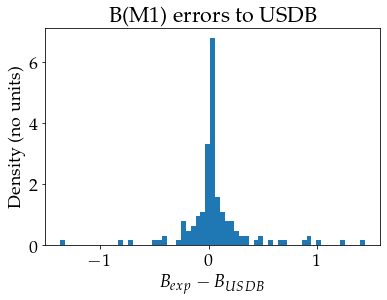

Average Error = 0.061 +/- 0.314


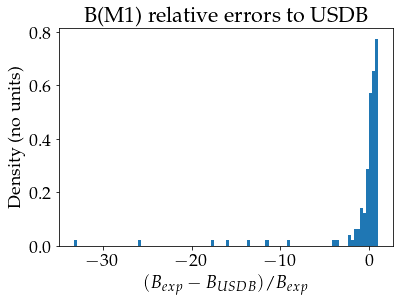

Average Relative error = -0.757 +/-   4.4


In [59]:
plt.hist(errors_usdb,bins=optimal_n_bins(errors_usdb),density=True)
plt.xlabel(r'$B_{exp} - B_{USDB}$')
plt.ylabel('Density (no units)')
plt.title('B(M1) errors to USDB')
plt.show()
print(f'Average Error = {np.mean(errors_usdb):5.3} +/- {np.std(errors_usdb):5.3}')

plt.hist(relative_errors_usdb,bins=optimal_n_bins(relative_errors_usdb),density=True)
plt.xlabel(r'$(B_{exp} - B_{USDB})/B_{exp}$')
plt.ylabel('Density (no units)')
plt.title('B(M1) relative errors to USDB')
plt.show()
print(f'Average Relative error = {np.mean(relative_errors_usdb):5.3} +/- {np.std(relative_errors_usdb):5.3}')